# Syllabus

- Hypothesis testing
- Practical usage of statisctics

# Hypothesis testing

### Case study

You are part of a machine learning team at a growing e-commerce company that specializes in selling home goods — everything from furniture to kitchenware.

**Business presents you with a challenge:**

"We want customers not just to buy, but to buy more. What can we do to increase the average amount customers spend per purchase?"

***So, how can we, as ML engineers, solve this task?***

#### *Possible solution*

**Create recomendation system:**
- Basket Analysis
- Cross-Sell
- Collaborative filtering

**Guiding Question**

> *"How do we scientifically determine whether our new recommendation system truly boosts customer spending — or whether any observed changes are just random noise?"*

#### **What we did?**

>We created the business hypothesis that the mean purchase value for users with the new recommendation system will be higher than the old system.

Let's use this **business case** to explore:

- How to define and formalize business problems into statistical questions?

- How to design experiments that test whether our ideas actually work?

- How to apply hypothesis testing to make confident, data-driven decisions?

## Theory background

### Null and Alternative Hypothesis

In statistics

* **Null Hypothesis (H₀)**:
  This is the default assumption that there is **no effect**, **no difference**, or **no change**.
  It states that any observed effect in your data is due to random chance.
  
  Example:
  * H₀: μ₁ = μ₂ (the two group means are equal)
  * H₀: p₁ = p₂ (the two group proportions are equal)

  Our case:
  * H₀: μ₁ = μ₂ (business change has no impact and the mean purchase value DOESN'T changed)

* **Alternative Hypothesis (H₁ or Ha)**:
  This is what you want to prove — that **there is an effect**, **a difference**, or **a change**.
  Example:

  * H₁: μ₁ ≠ μ₂ (the means are different)
  * H₁: p₁ > p₂ (one proportion is greater than the other)

  Our case:
  * H₁: μ₁ ≠ μ₂ (business change causes improvement and the mean purchase value increased)

In short:

* **H₀** = No change, no impact, status quo.
* **H₁** = A real change, impact, or difference exists.


**Based on your data and hypothesis type, choose a statistical test**

* [t-test](https://www.geeksforgeeks.org/t-test/) (for comparing means)

* [Chi-square test](https://www.geeksforgeeks.org/ml-chi-square-test-for-feature-selection/) (for categorical data)

* [ANOVA](https://www.analyticsvidhya.com/blog/2020/06/introduction-anova-statistics-data-science-covid-python/) (for comparing means among multiple groups)

* [Regression analysis](https://www.geeksforgeeks.org/what-is-regression-analysis/) (for relationships between variables)

### t-test

The t-test is a statistical test procedure that tests whether there is a significant difference between the means of two groups.

Steps to perform:
* calculate t-value
* decide significance level (probability of rejecting the null hypothesis when it is actually true, usually 0.05)
* collect data
* calculate degrees of freedom
* look-up the p-value
* make a decision



- **t-value**

To calculate the t-value, we need two values. First, we need the difference of the means and second, the standard deviation from the mean. This value is called the standard error.

  $$
  t = \frac{ \bar{Y} - \bar{X} }{ \sqrt{ \frac{s_Y^2}{n_2} + \frac{s_X^2}{n_1} } }
  $$

  where:

  * $\bar{X}, \bar{Y}$ - sample means
  * $s_X^2, s_Y^2$ - sample standart deviation
  * $n_1, n_2$ - sample sizes


- **degrees of freedom**

The degrees of freedom (df) for two independent samples (when the sample sizes and variances may be unequal) is calculated as:
$$
df = \frac{ \left( \frac{s_X^2}{n_X} + \frac{s_Y^2}{n_Y} \right)^2 }{ \frac{ \left( \frac{s_X^2}{n_X} \right)^2 }{n_X-1} + \frac{ \left( \frac{s_Y^2}{n_Y} \right)^2 }{n_Y-1} }
$$

If sample size and varience equal, the degrees of freedom is calculated as:
$$
df = {n_X} + {n_Y} - 2
$$

Approximate it or use `scipy.stats.ttest_ind` 

- **p-value**

The p value, or probability value, tells you how likely it is that your data could have occurred under the null hypothesis.

$$
  p = \mathbb{P}( T > t_{\text{obs}} \mid H_0 )
$$

  where:
  - $T$- t-distributed with calculated degrees of freedom
  - $t_{obs}$ - calculated t-value


*One-sided test because we only care about increase.*


Use the t-distribution table or a software tool to find the critical value or the p-value.

- **decision**

If the calculated t-value is greater than the critical t-value, we reject the null hypothesis. 

If the p-value is smaller than the decided significance level, we reject the null hypothesis.


## Example

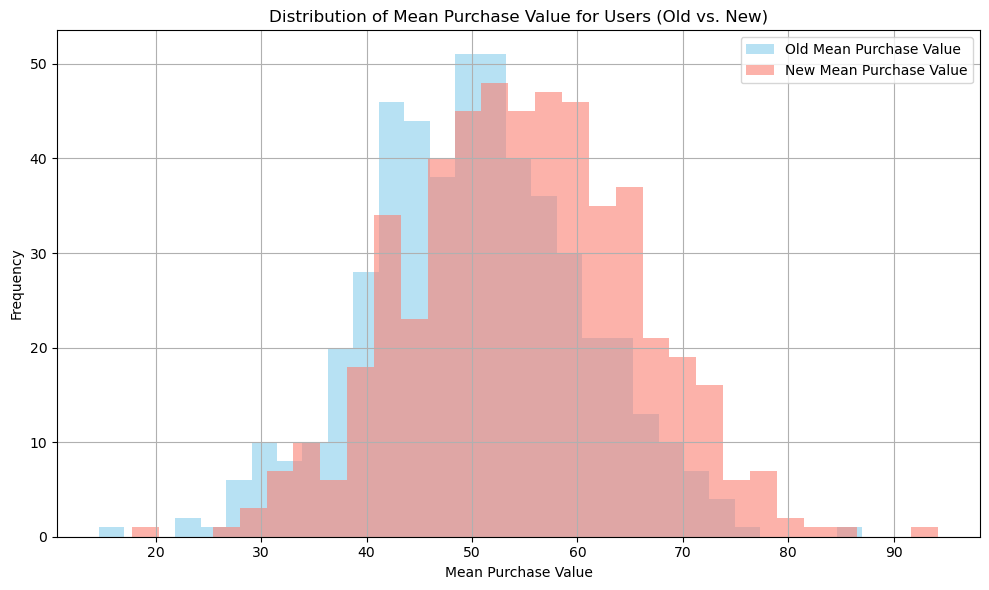

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Generate the data for old and new mean purchase values
old = np.random.normal(50, np.sqrt(100), 500)
new = np.random.normal(54, np.sqrt(120), 520)

# Create a figure and axes
plt.figure(figsize=(10, 6))

# Plot the histograms for data
plt.hist(old, bins=30, alpha=0.6, color='skyblue', label='Old Mean Purchase Value')
plt.hist(new, bins=30, alpha=0.6, color='salmon', label='New Mean Purchase Value')

# Add labels and title
plt.xlabel('Mean Purchase Value')
plt.ylabel('Frequency')
plt.title('Distribution of Mean Purchase Value for Users (Old vs. New)')

# Add a legend
plt.legend()

# Add a grid
plt.grid(True)
plt.tight_layout()

# Show the plot
plt.show()

In [2]:
from scipy.stats import ttest_ind
t_stat, p_value = ttest_ind(new, old, equal_var=False)

print(f"t-statistic: {t_stat:.3f}")
print(f"p-value: {p_value:.6f}")

t-statistic: 7.140
p-value: 0.000000


#### Conclusion

Since 0.00000 < 0.05, we reject the null hypothesis → the means are statistically significantly different.

>The new system has significantly changed the average purchase value and we can implement our algorythm into production.



# Practical usage of statistics

## EDA

EDA (Exploratory Data Analysis) is an approach to analyzing datasets to summarize their main characteristics, often using visual methods. It helps to gain insights into data, detect outliers, test assumptions, and check for underlying patterns before formal modeling.

**Methods:**

* Descriptive statistics (mean, median, mode, std, min/max)

* Histograms, boxplots, scatter plots

* Correlation matrix

In [3]:
import pandas as pd
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns
import sweetviz as sv

/home/work/.local/lib/python3.10/site-packages/pandas/core/computation/expressions.py:21: UserWarning: Pandas requires version '2.8.4' or newer of 'numexpr' (version '2.8.1' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED
/home/work/.local/lib/python3.10/site-packages/pandas/core/arrays/masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.2' currently installed).
  from pandas.core import (


In [4]:
# Load the dataset
df = pd.read_csv("diabetes.csv")
df.head()


Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1

                                             |          | [  0%]   00:00 -> (? left)


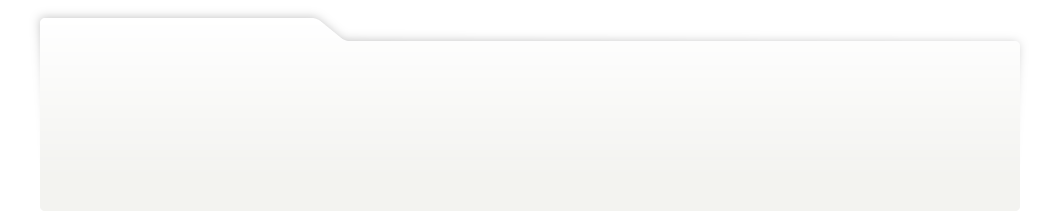
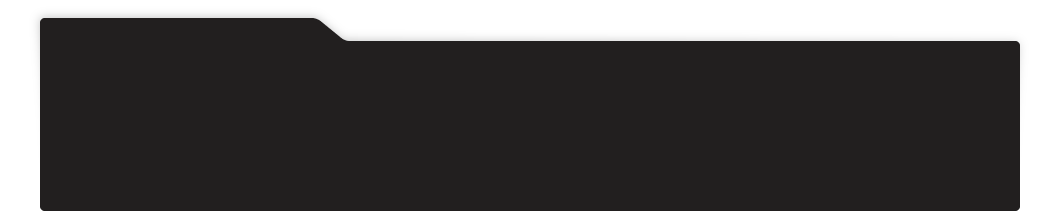
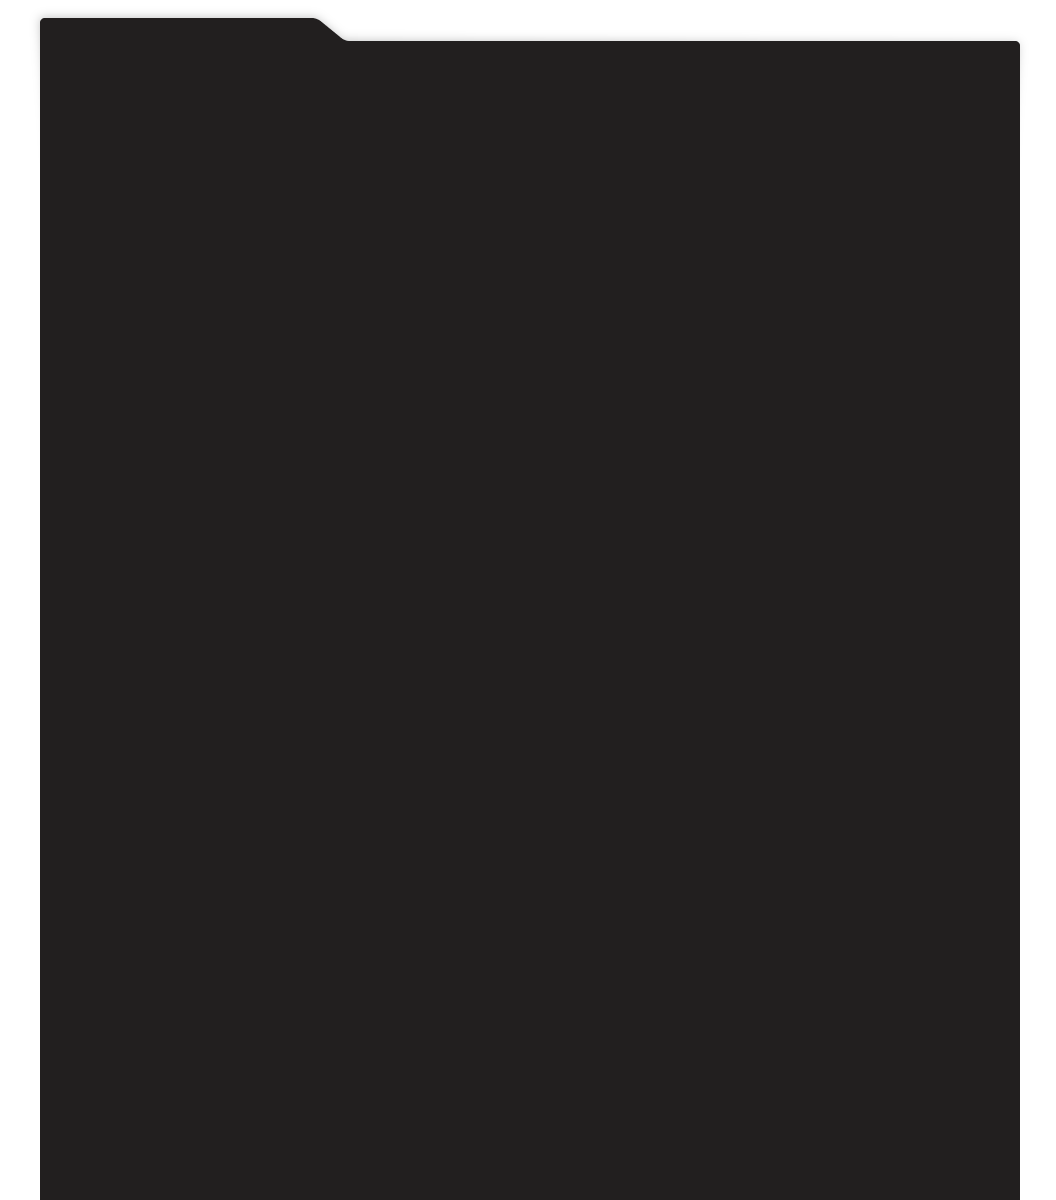
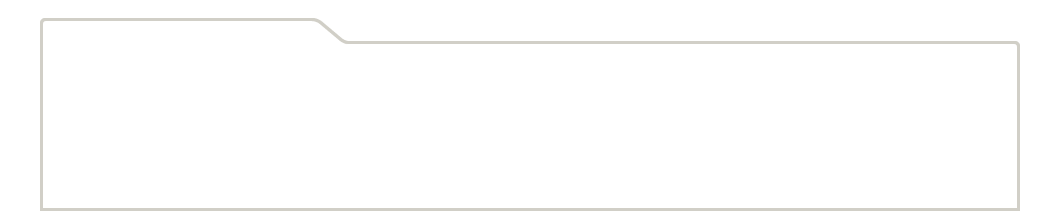
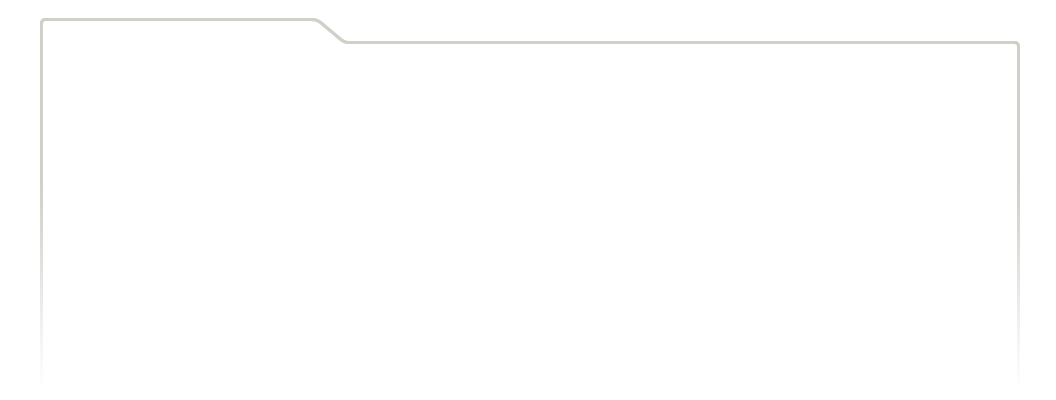
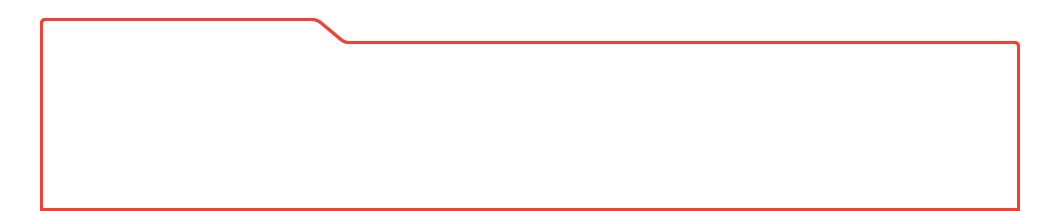
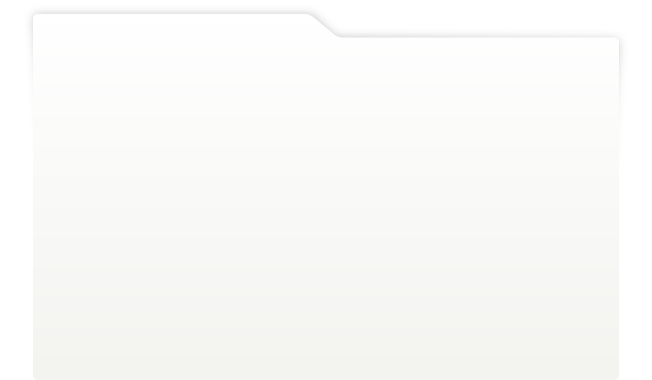
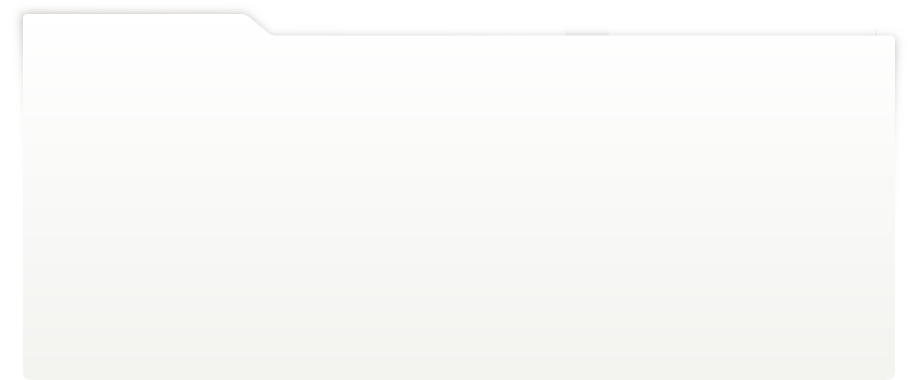
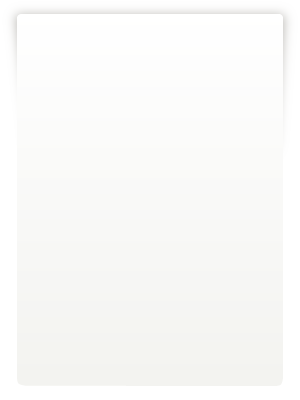
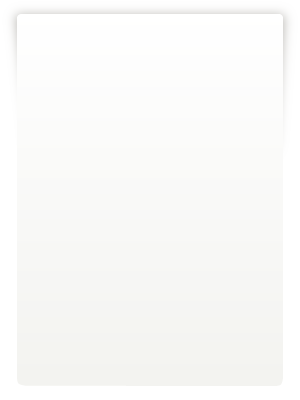
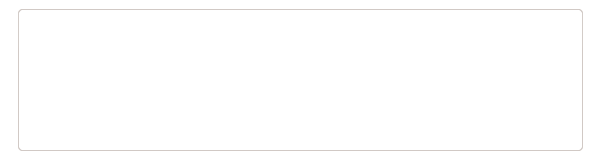
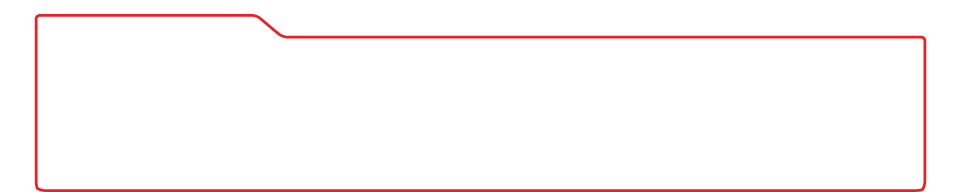
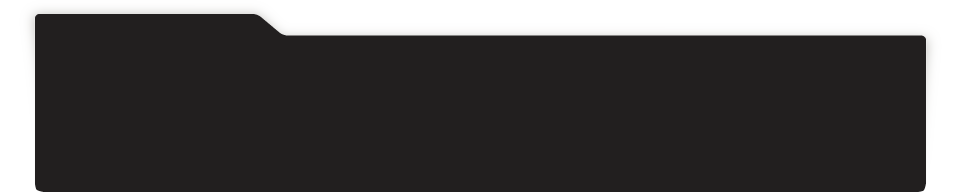
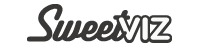
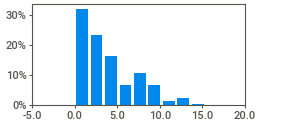
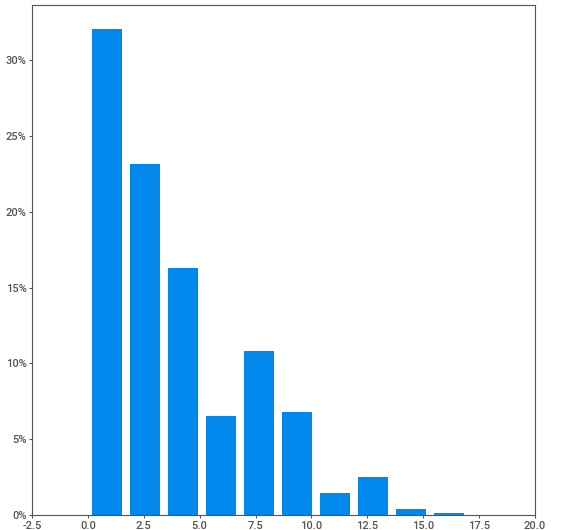
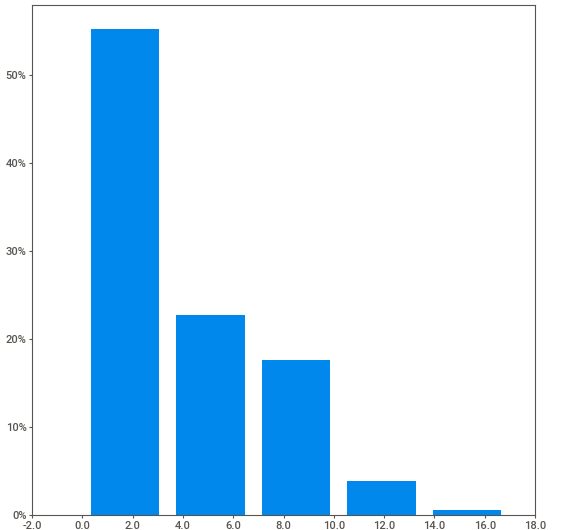
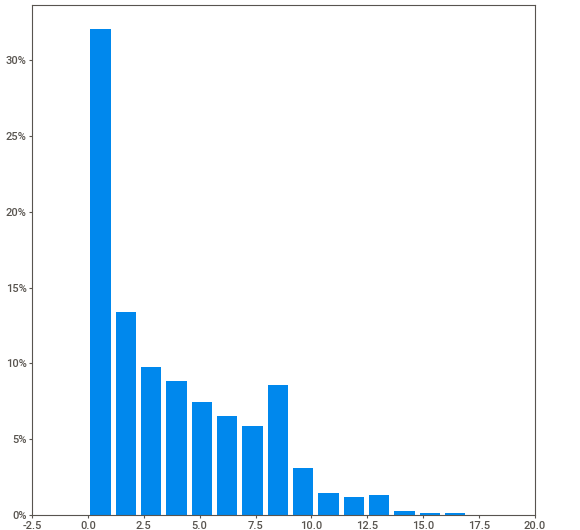
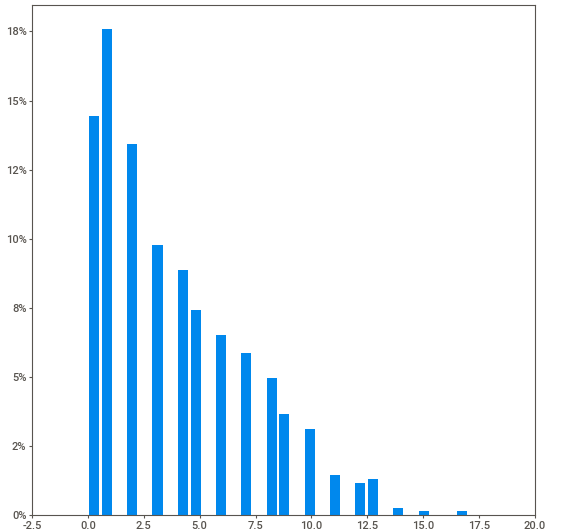
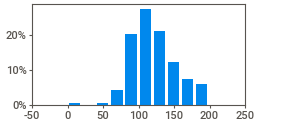
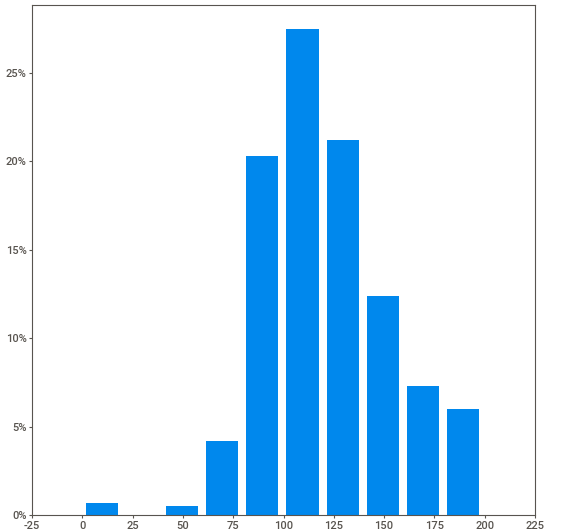
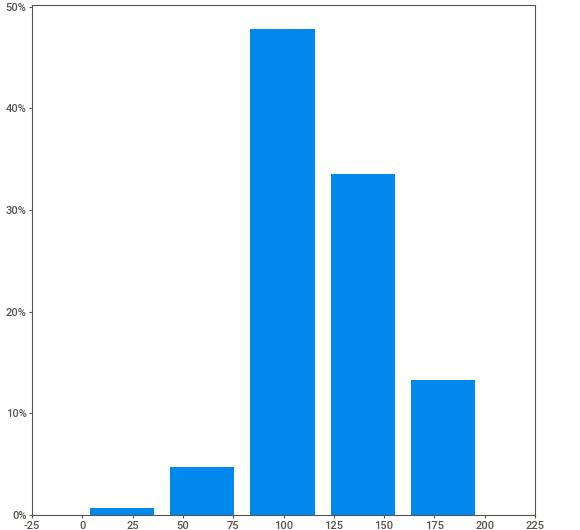
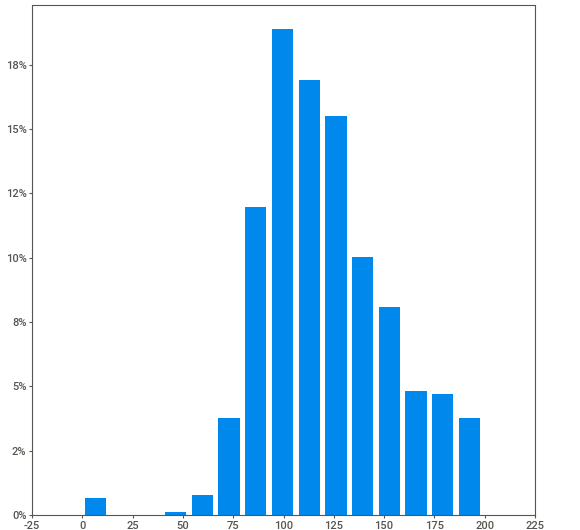
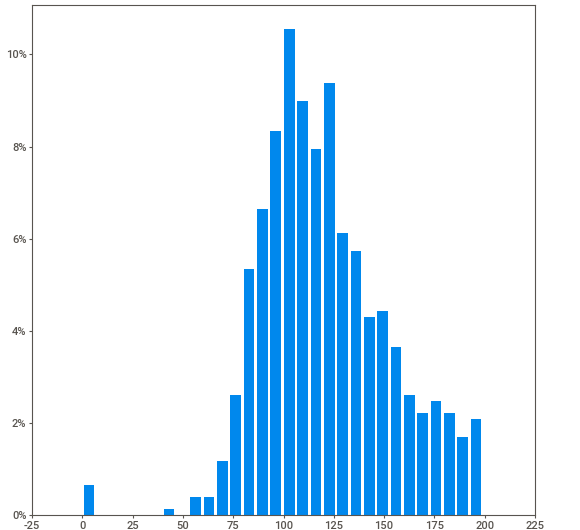
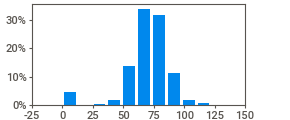
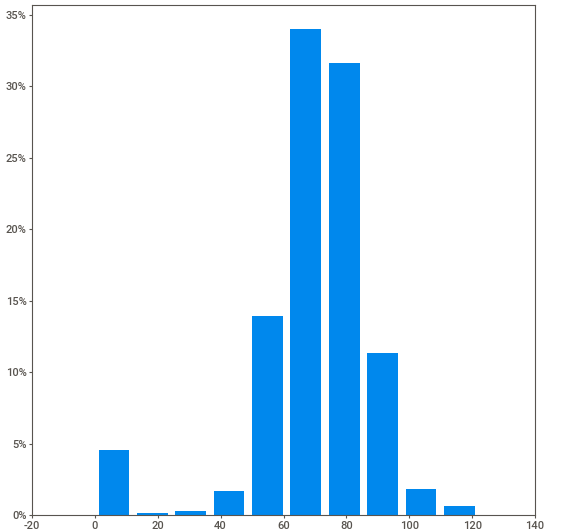
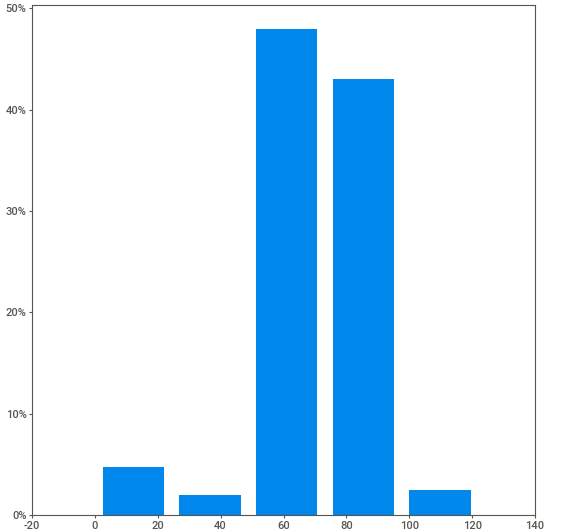
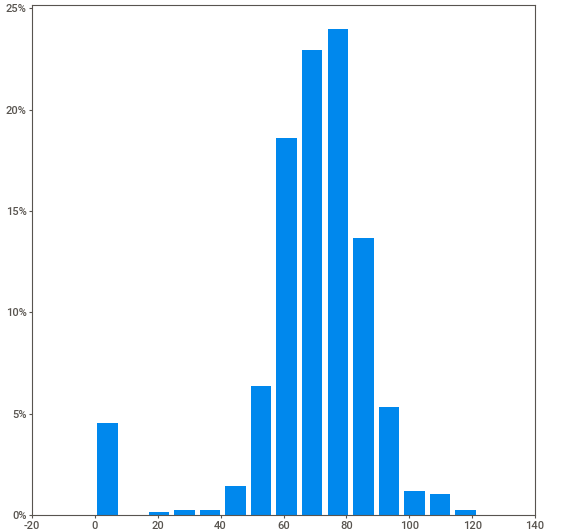
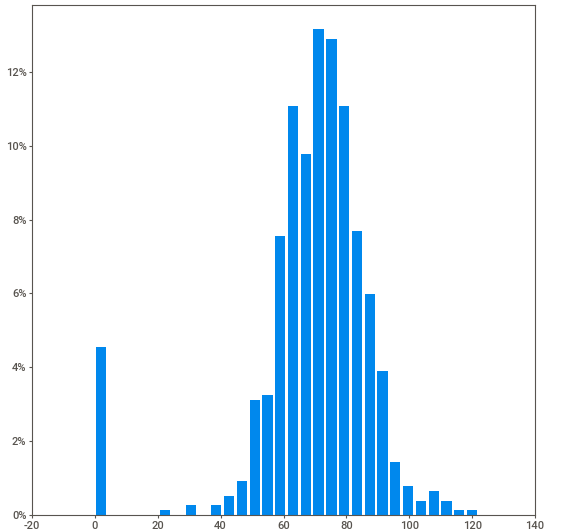
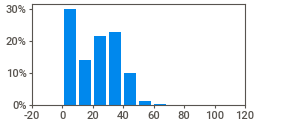
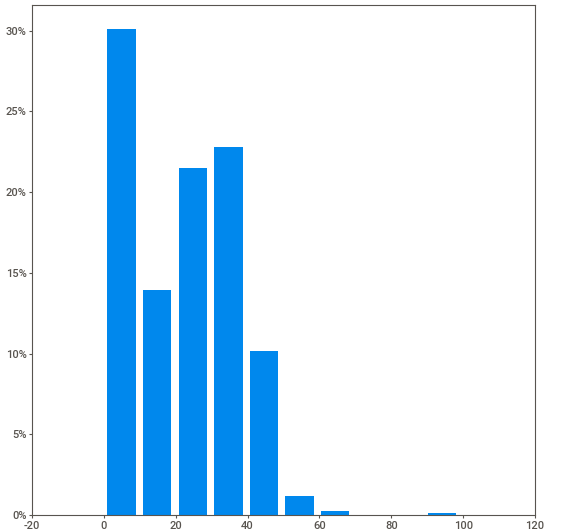
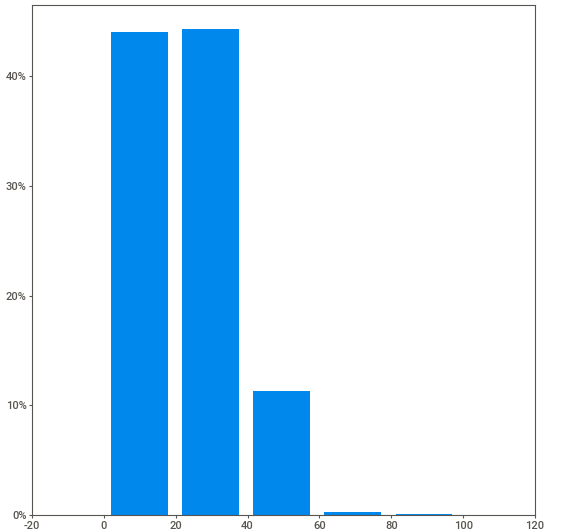
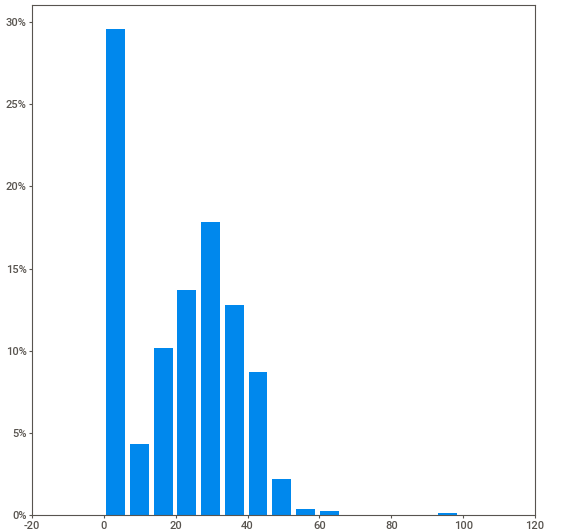
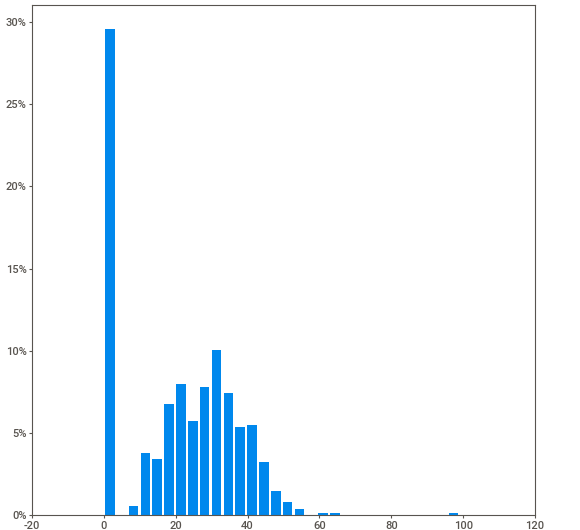
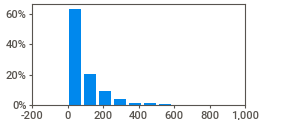
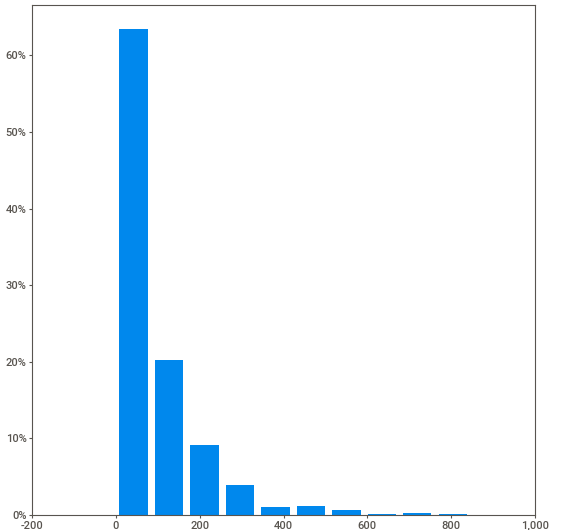
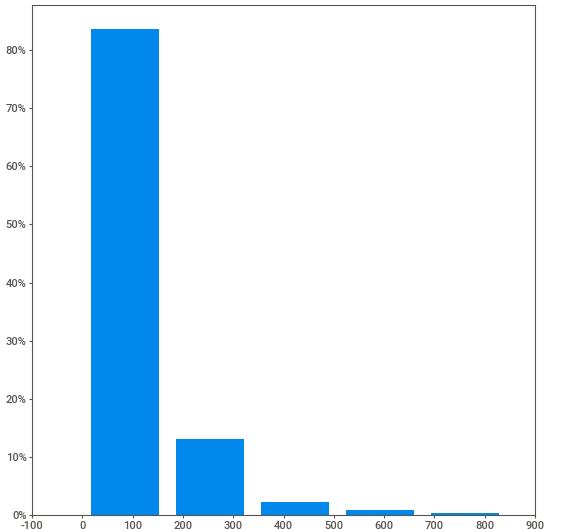
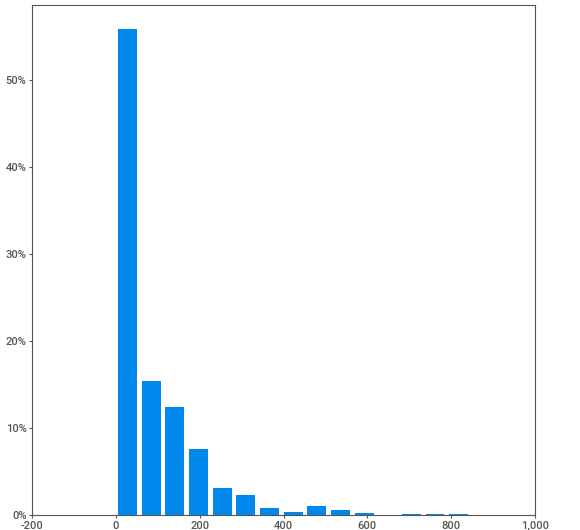
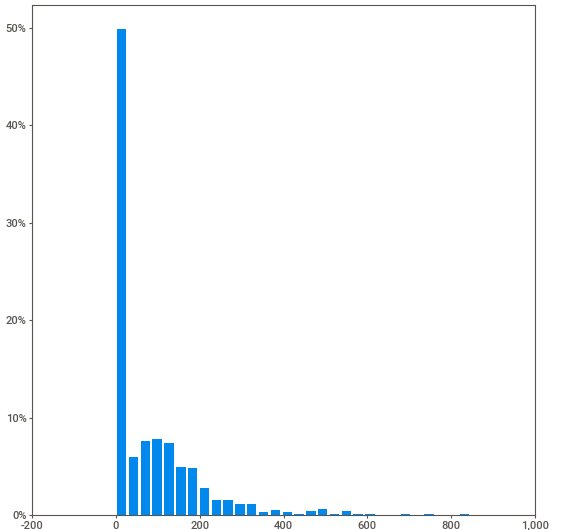
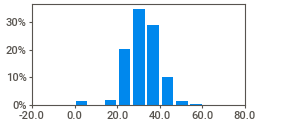
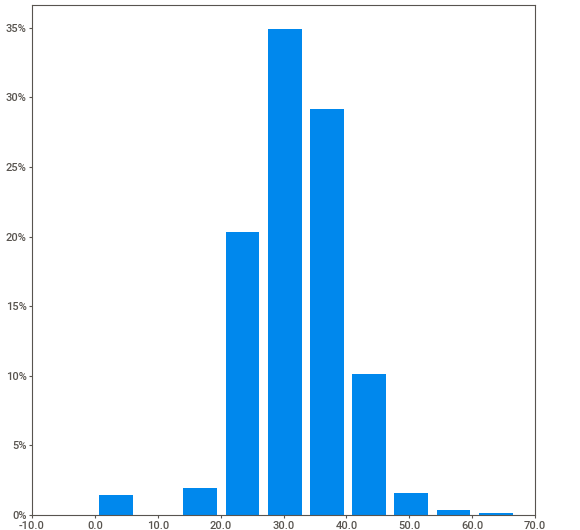
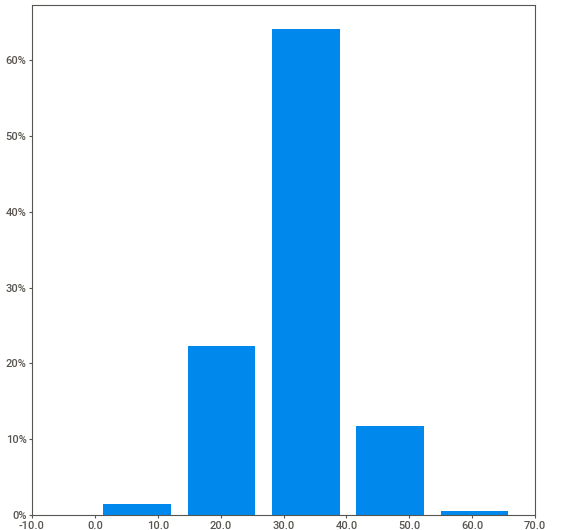
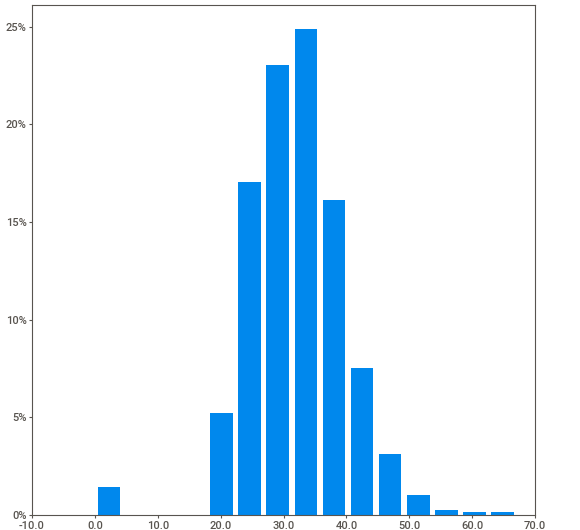
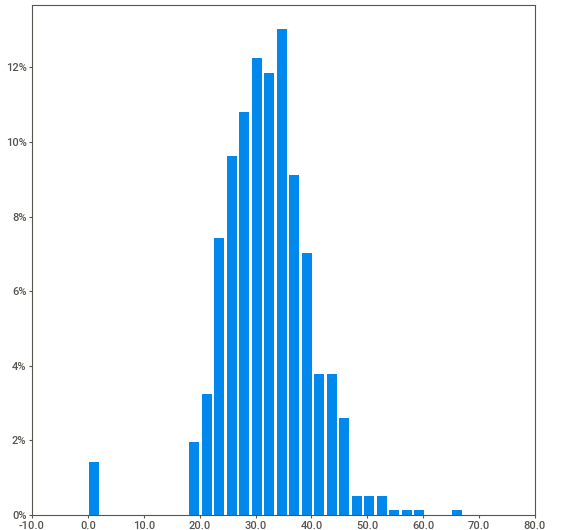
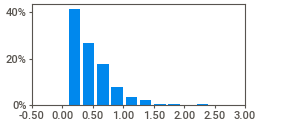
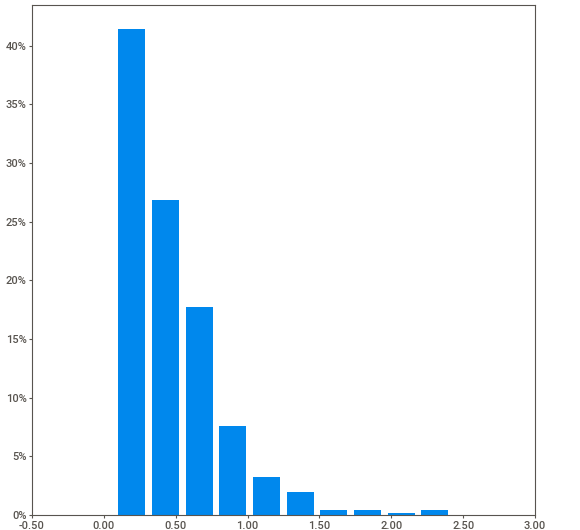
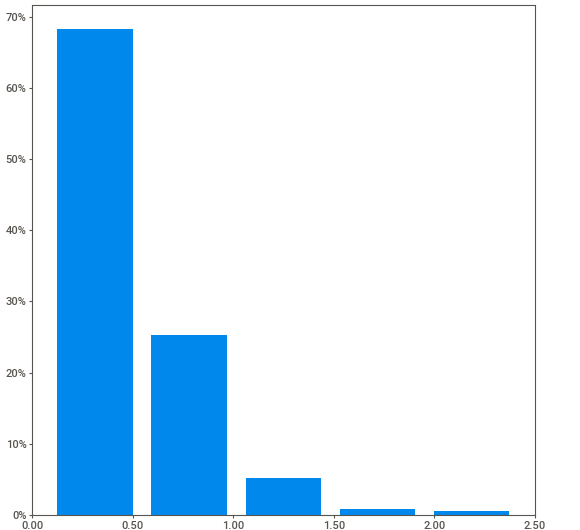
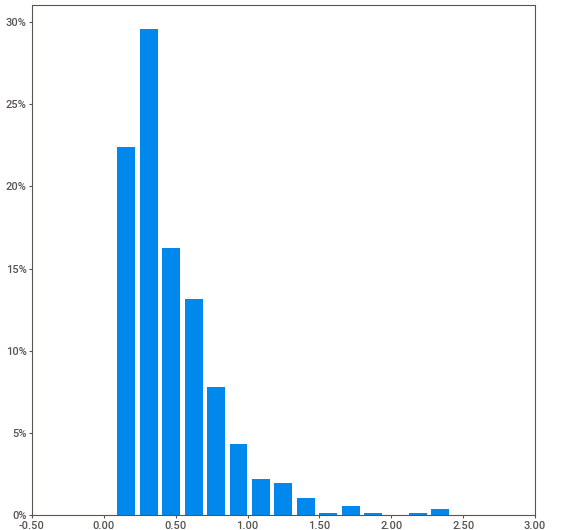
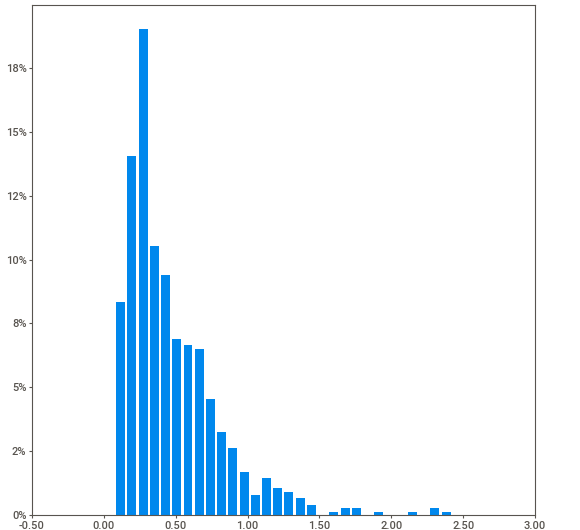
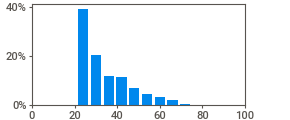
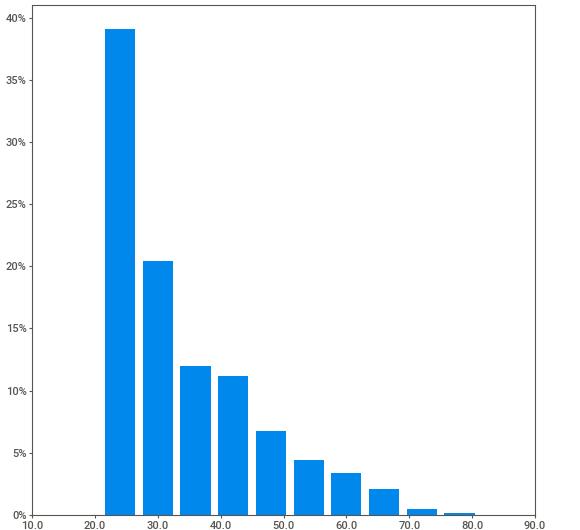
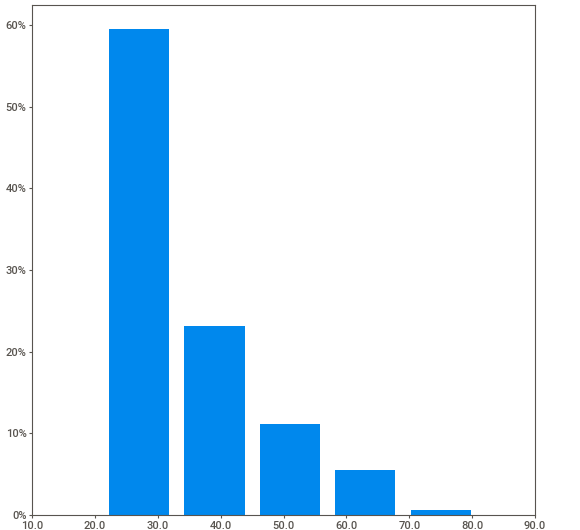
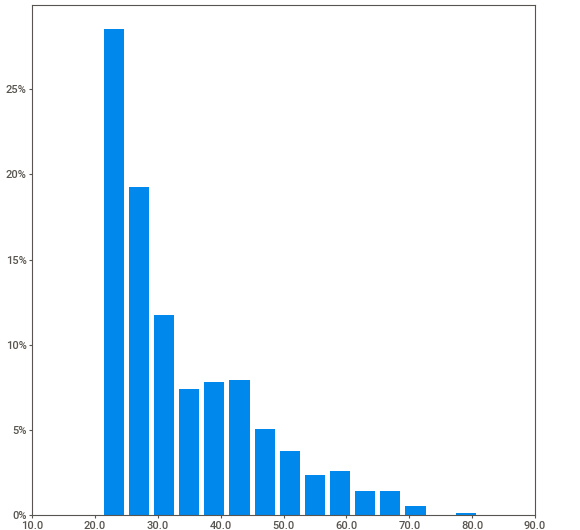
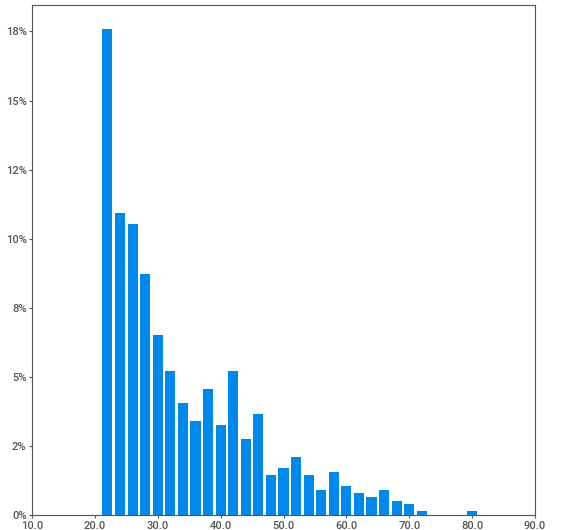
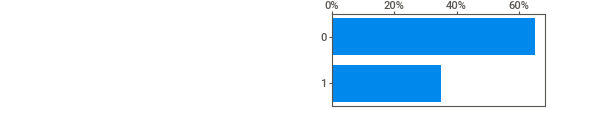
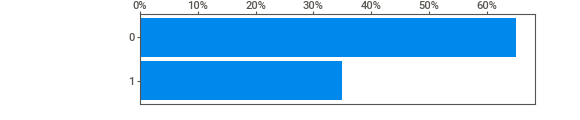
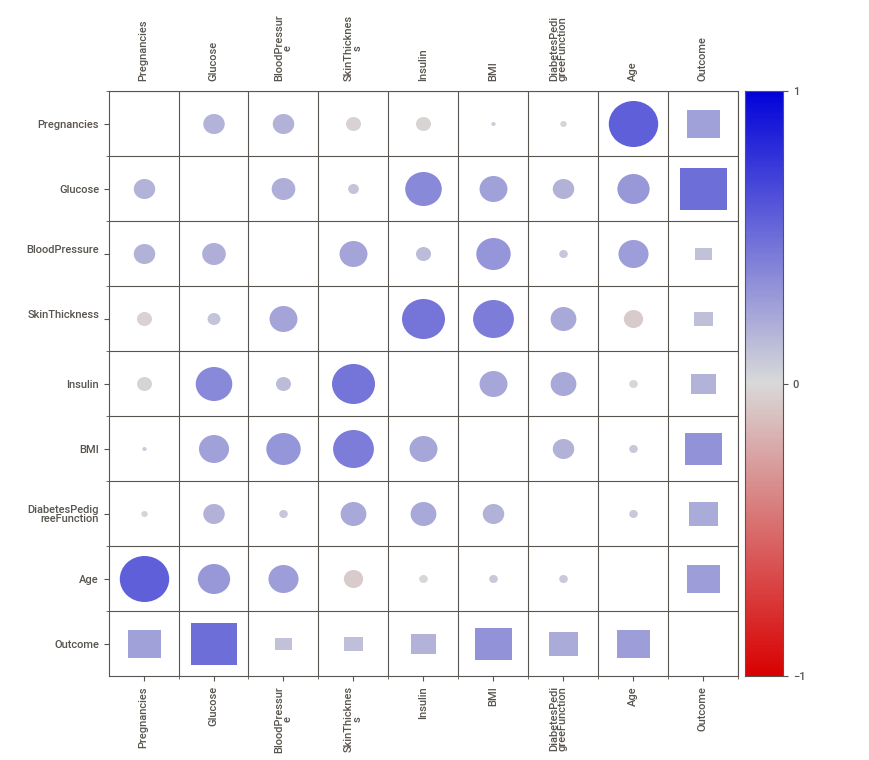
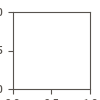

In [5]:
report = sv.analyze(df)
report.show_notebook()

                                             |          | [  0%]   00:00 -> (? left)


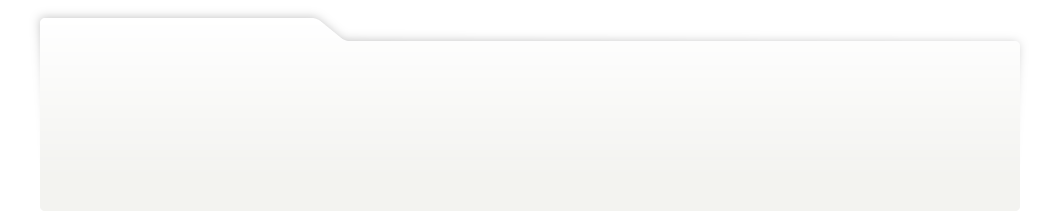
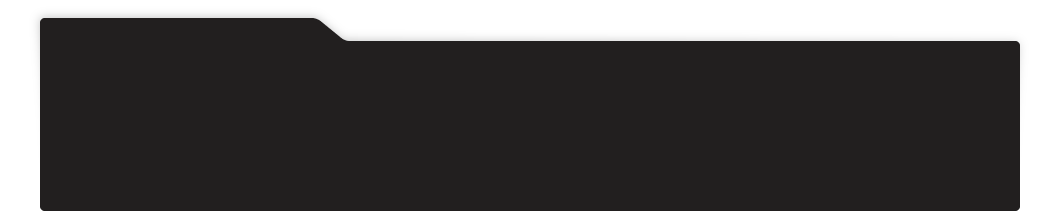
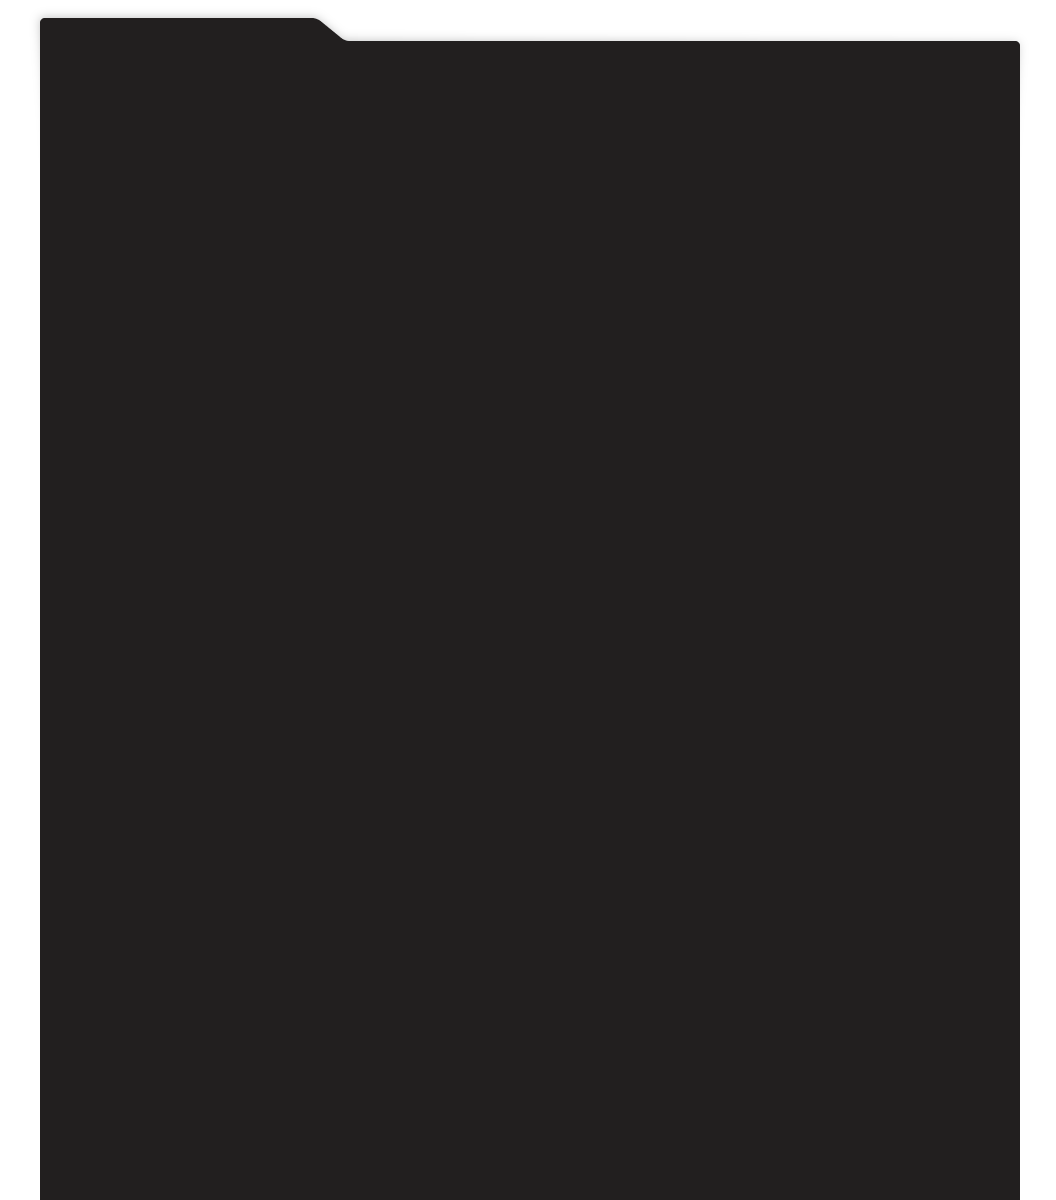
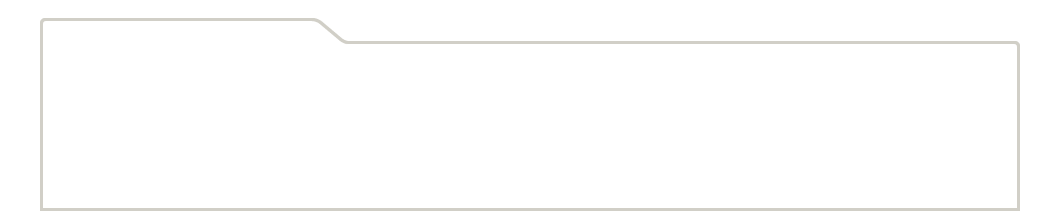
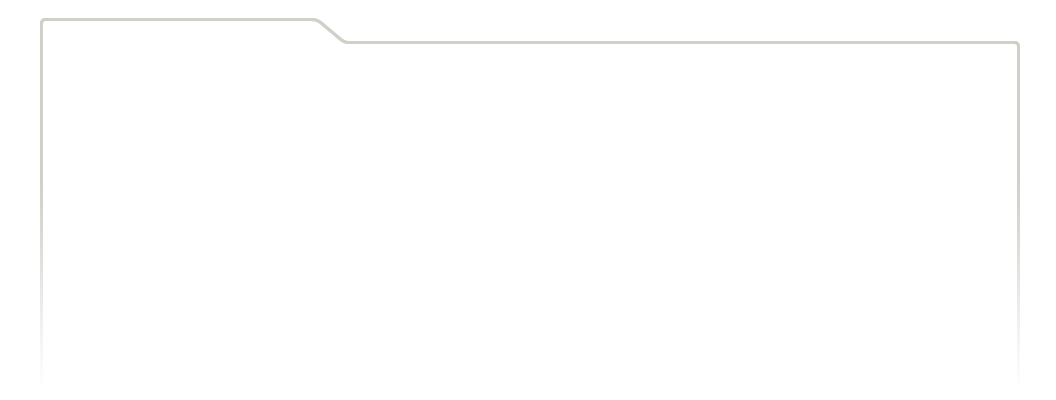
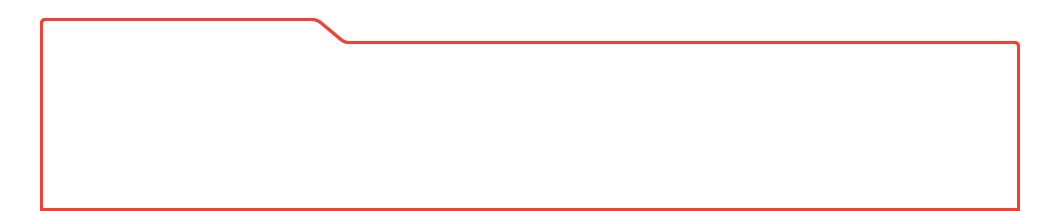
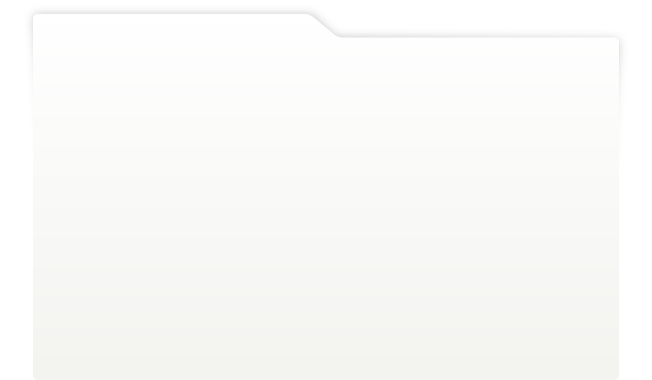
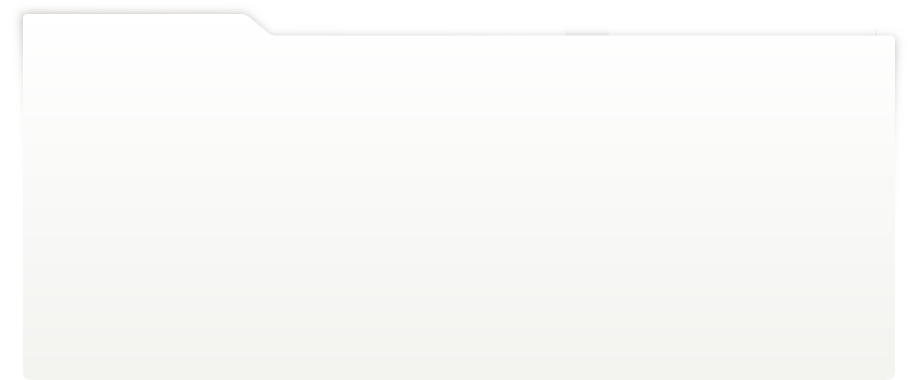
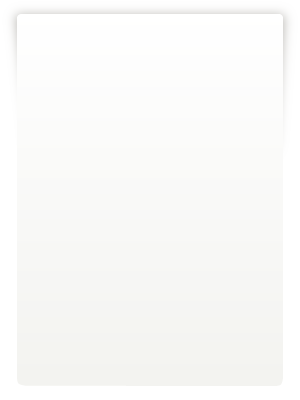
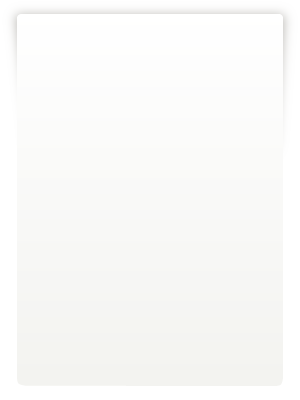
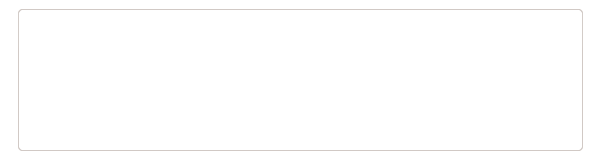
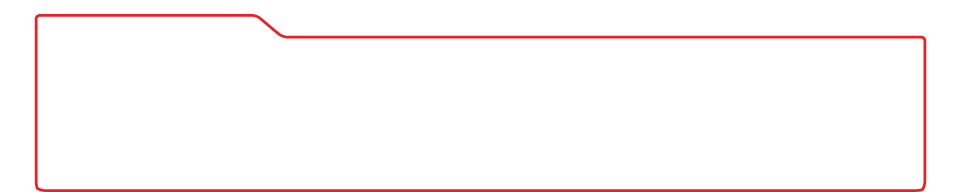
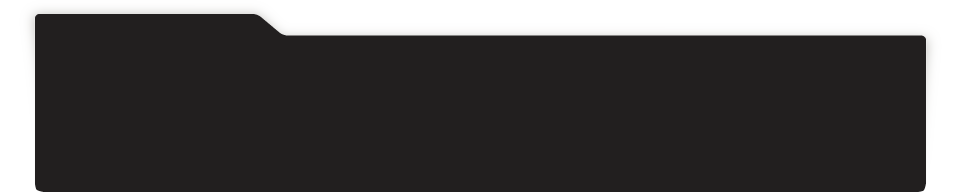
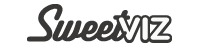
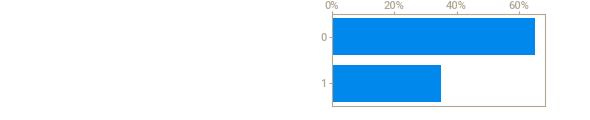
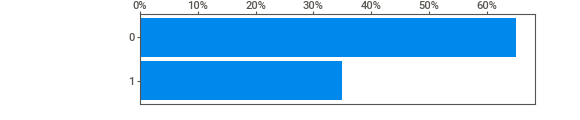
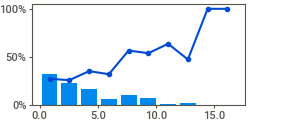
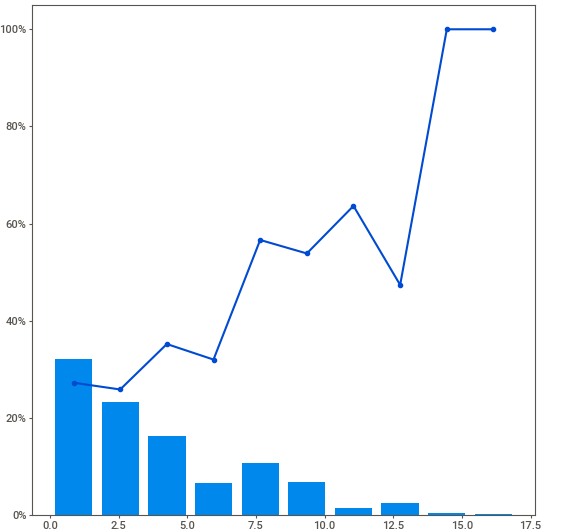
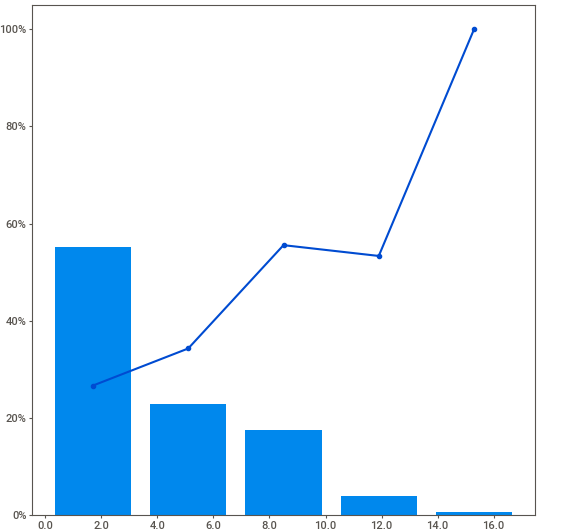
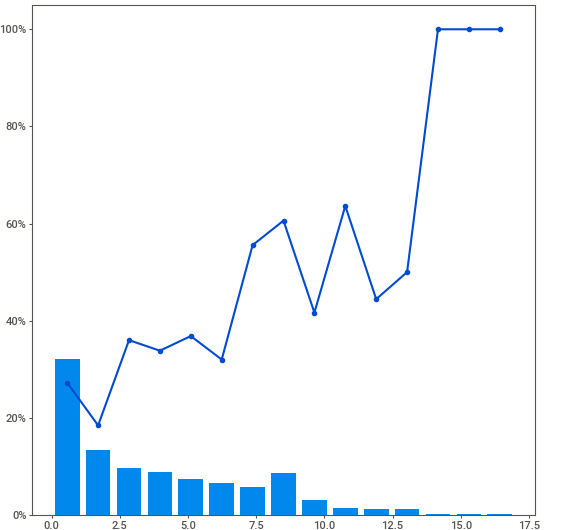
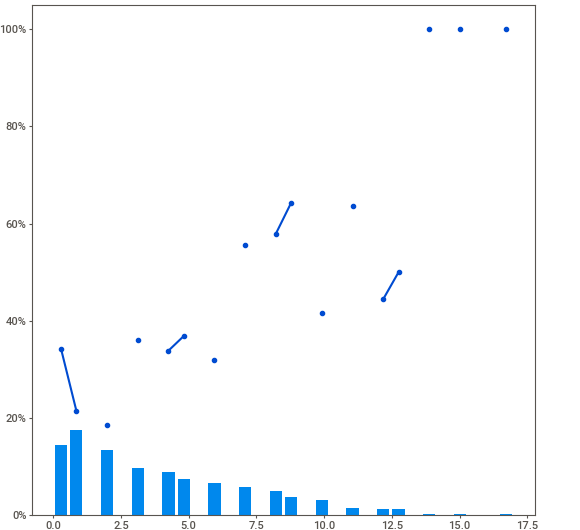
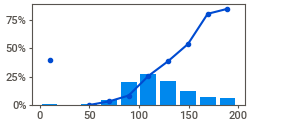
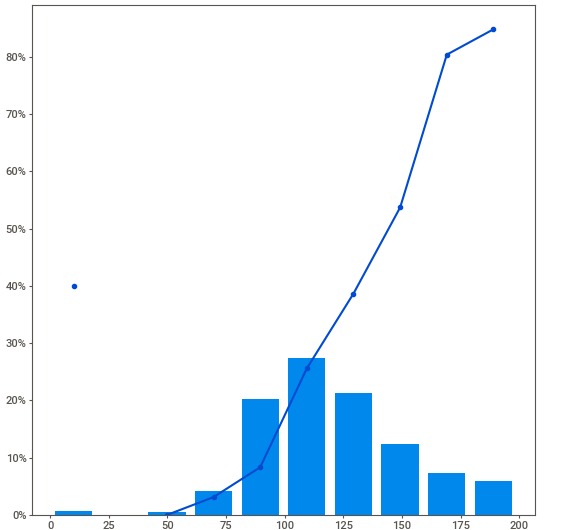
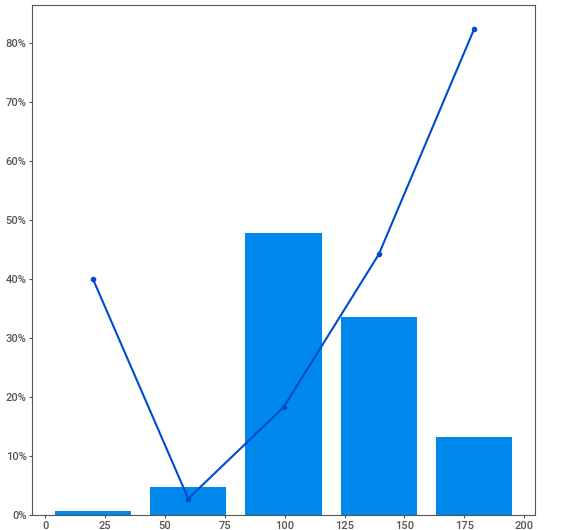
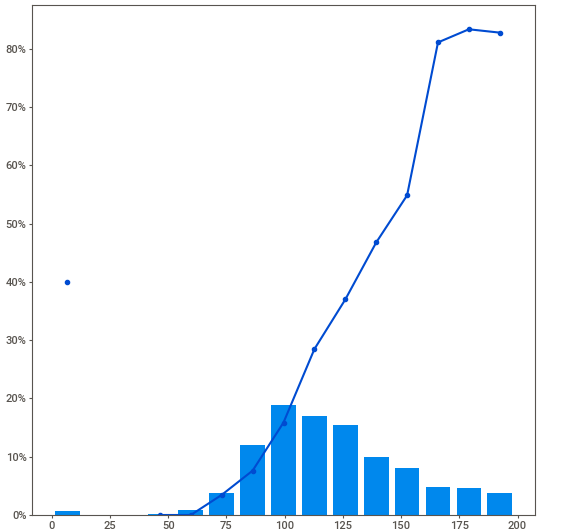
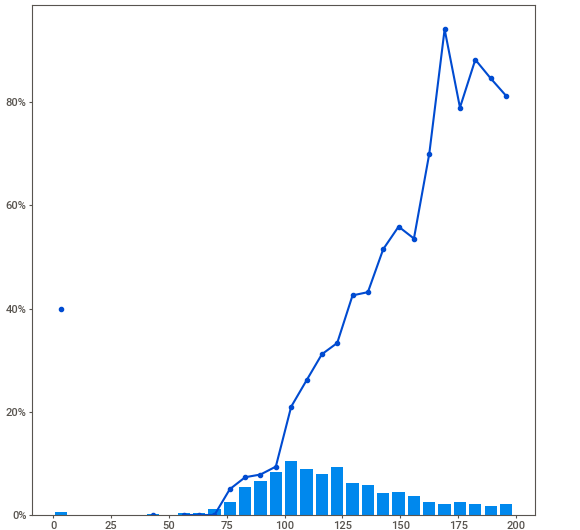
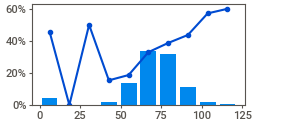
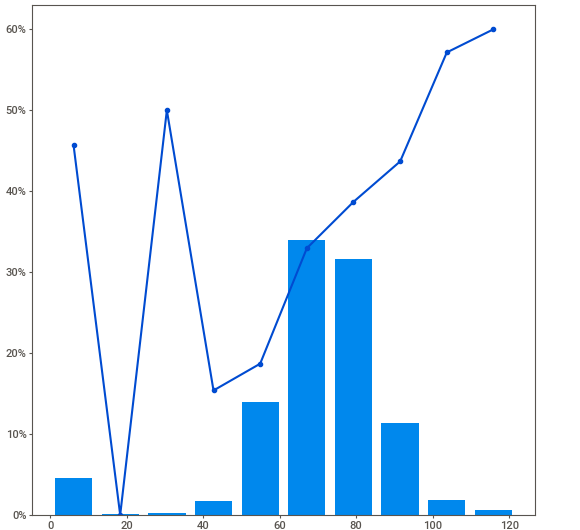
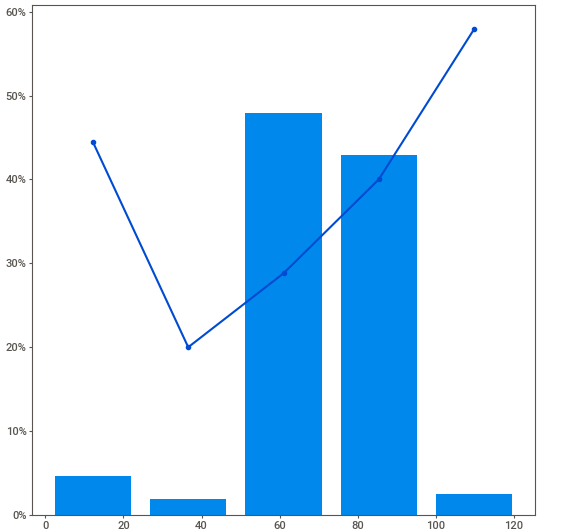
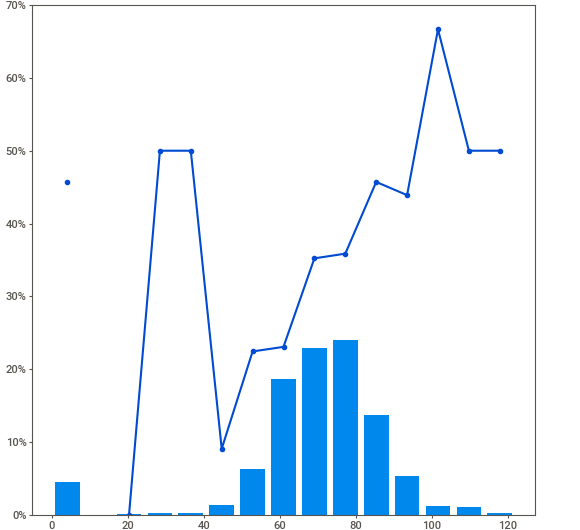
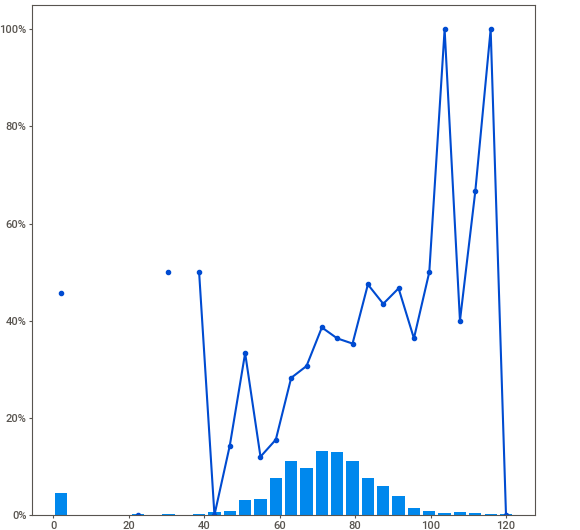
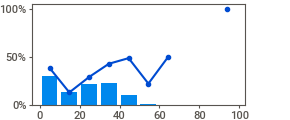
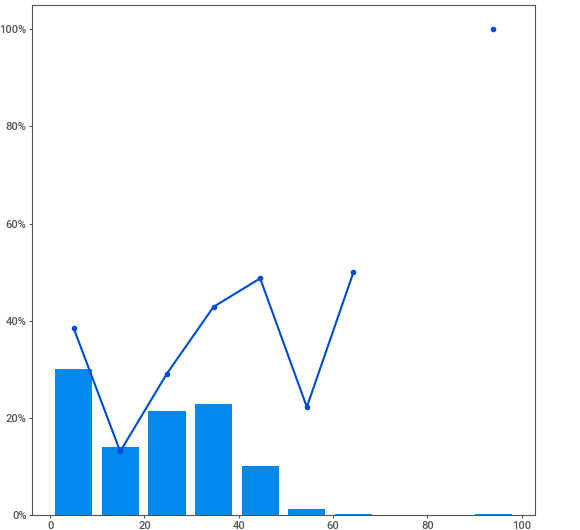
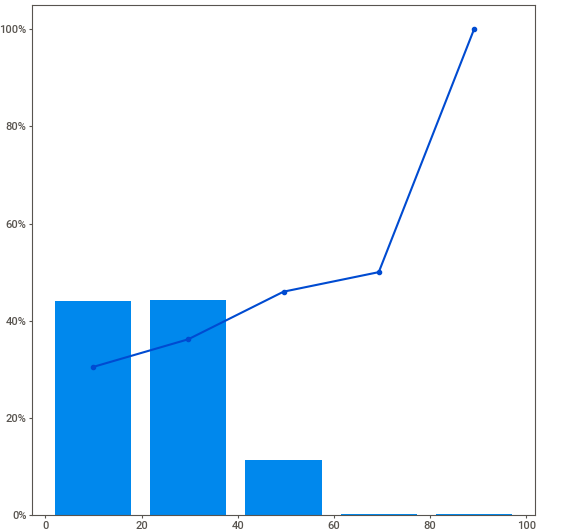
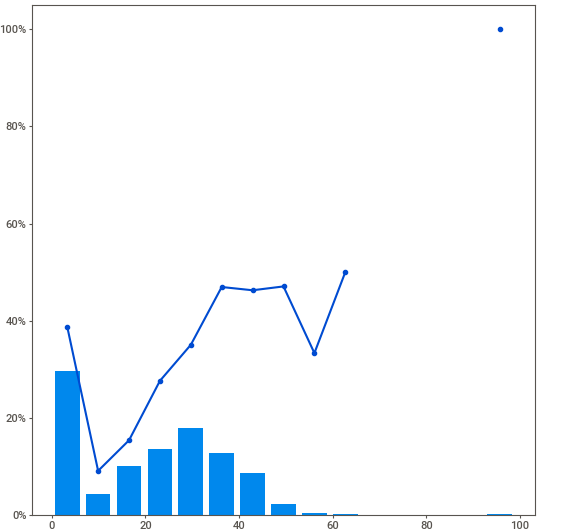
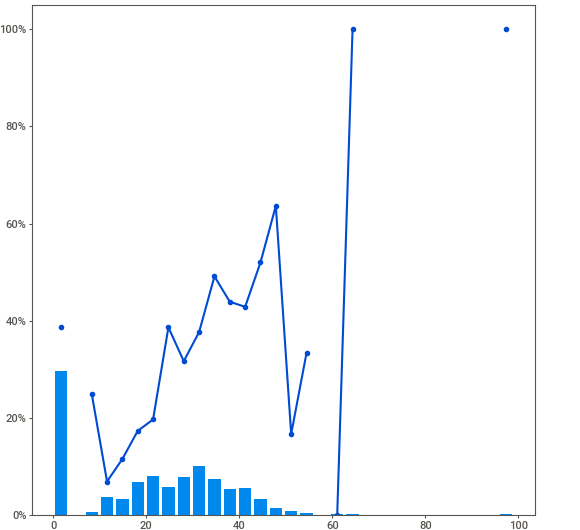
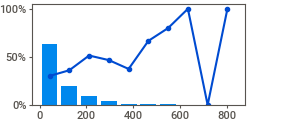
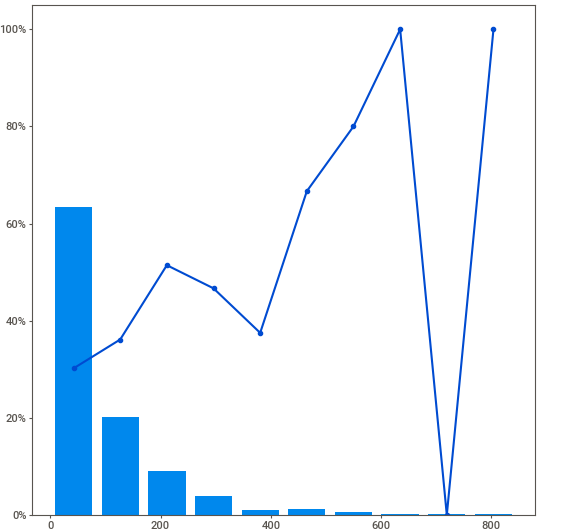
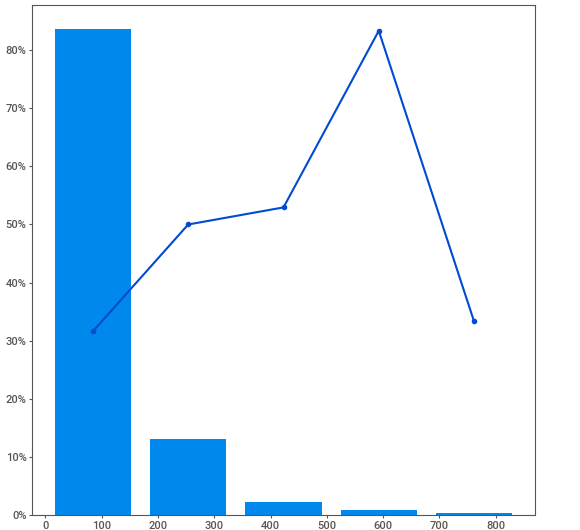
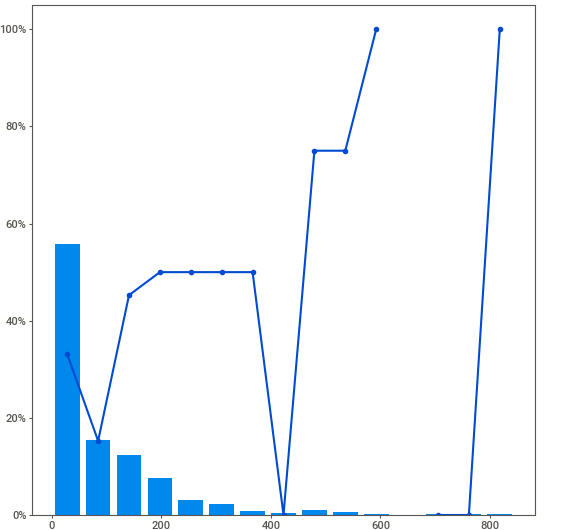
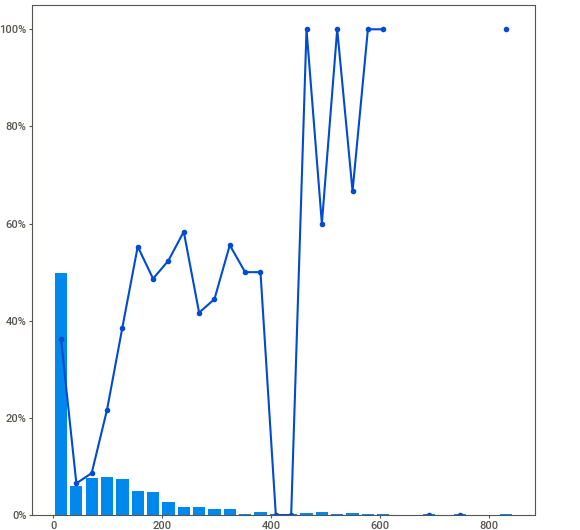
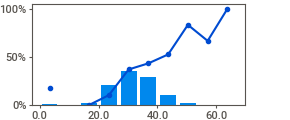
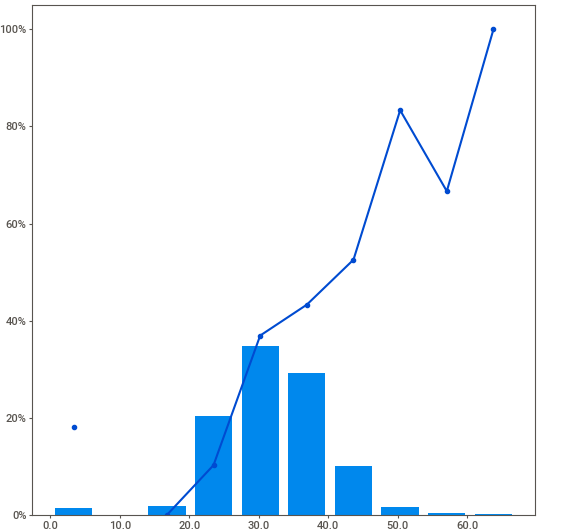
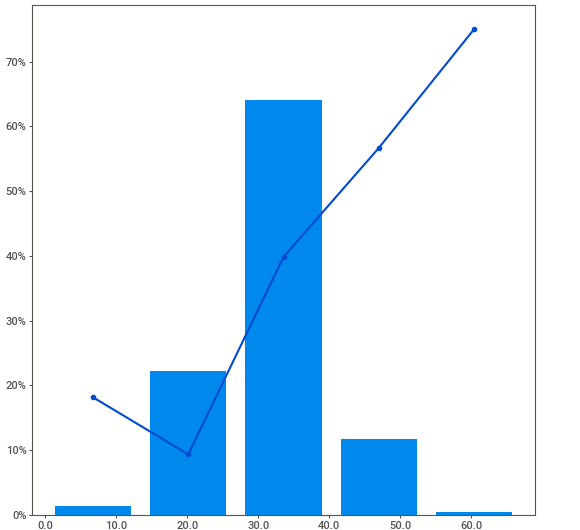
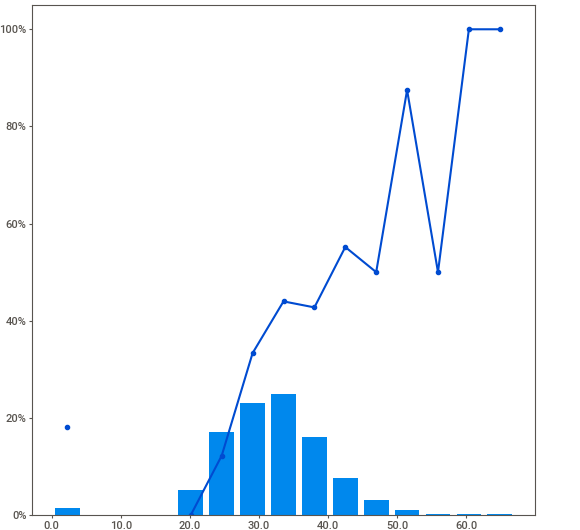
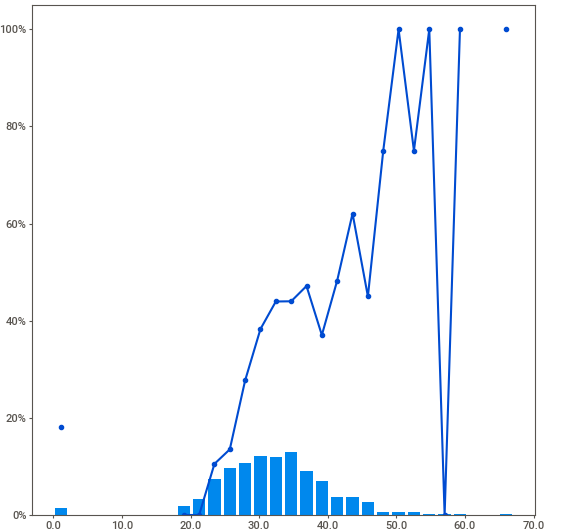
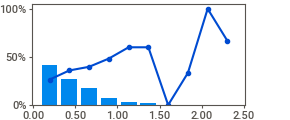
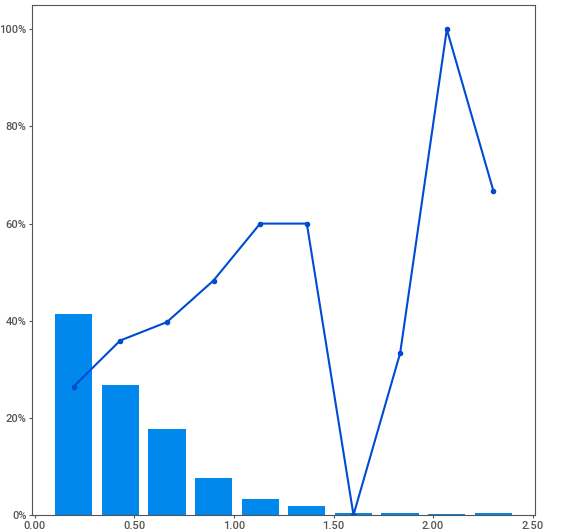
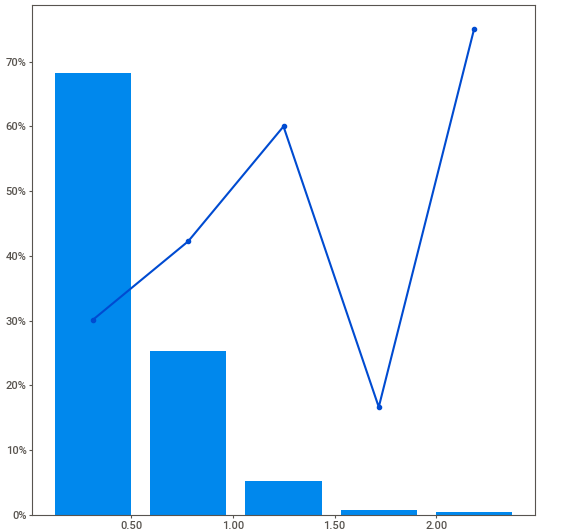
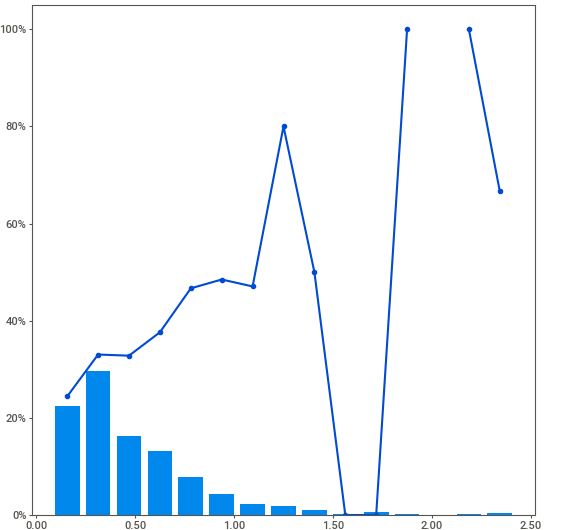
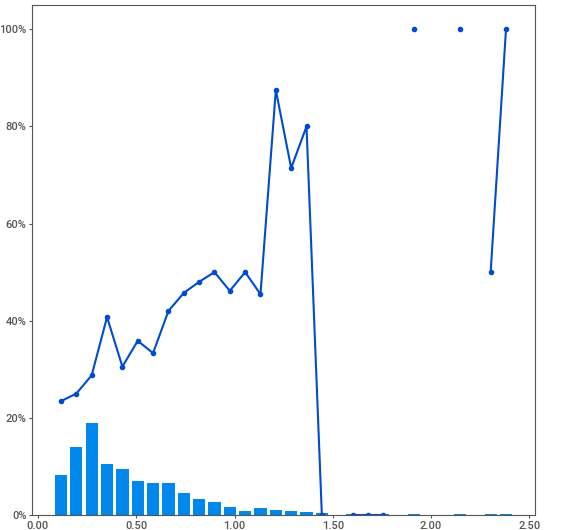
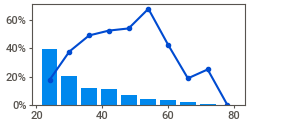
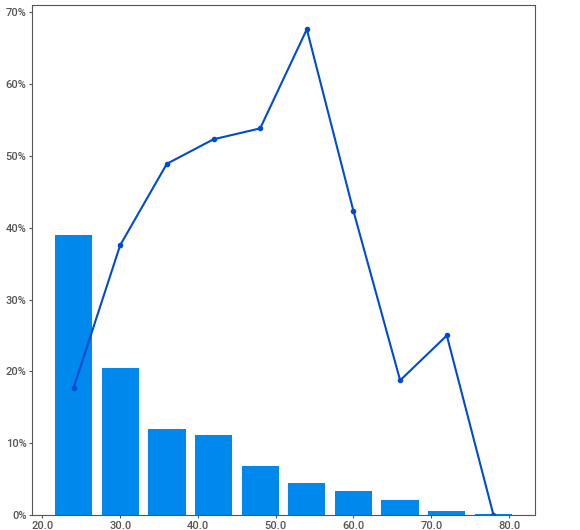
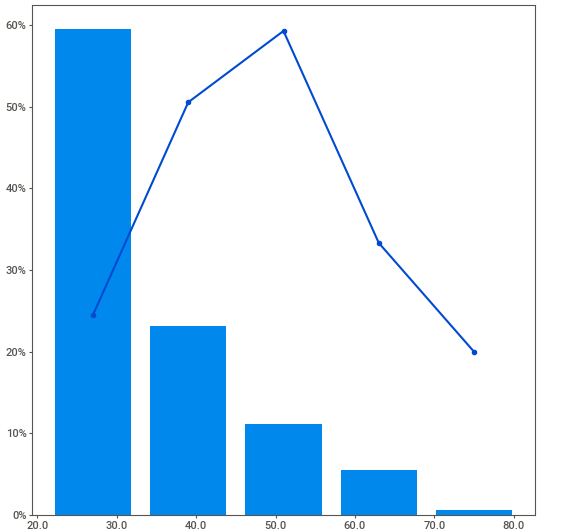
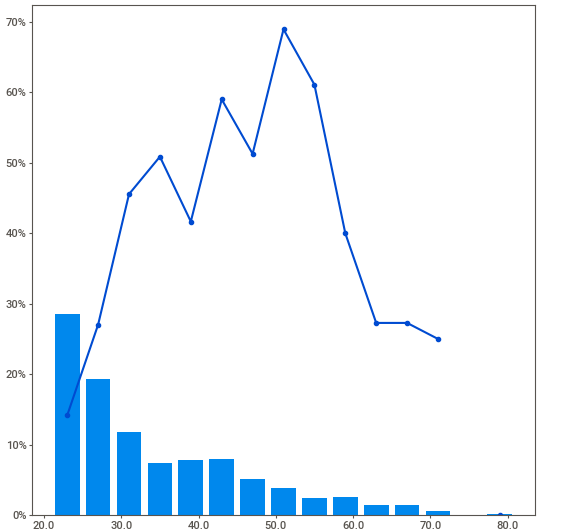
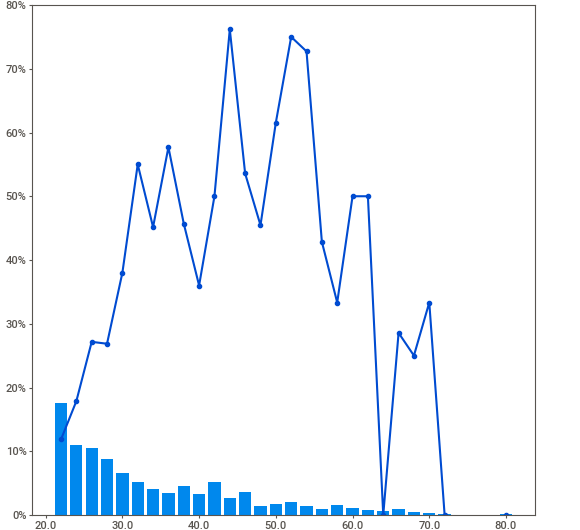
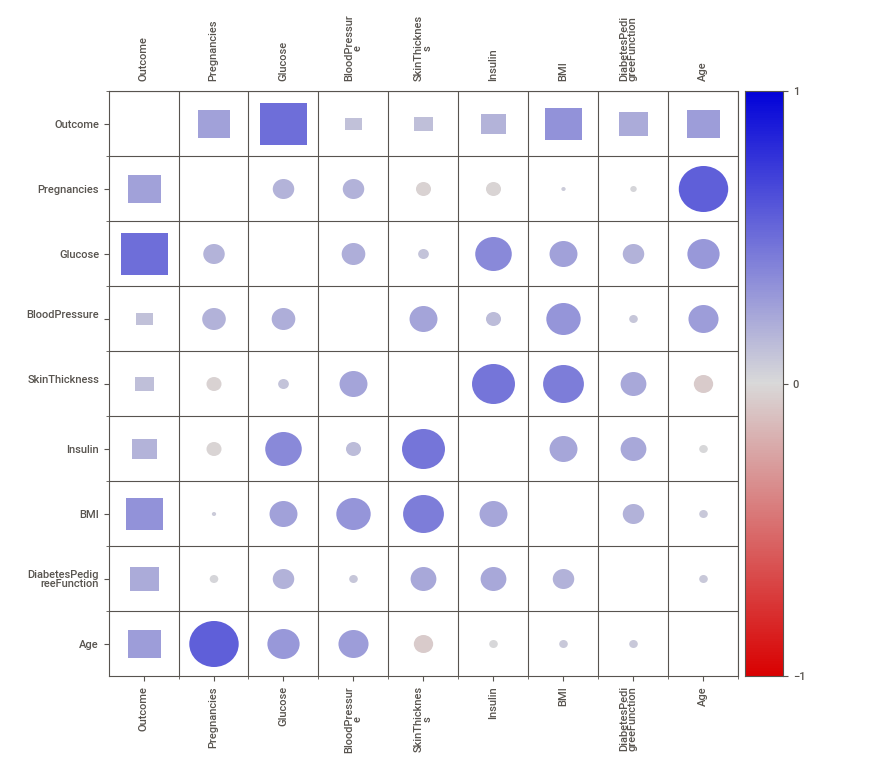
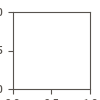

In [6]:
report = sv.analyze(df, target_feat="Outcome")
# report.show_html('common analysis.html')
report.show_notebook()

                                             |          | [  0%]   00:00 -> (? left)


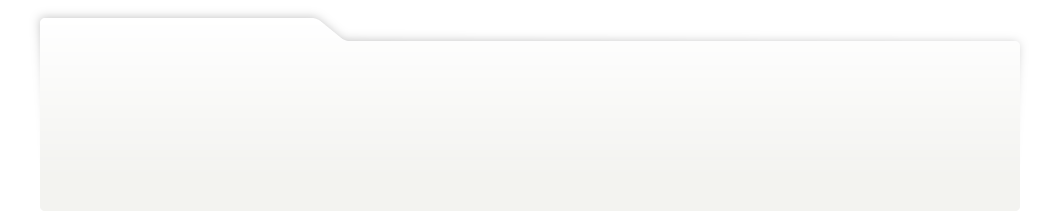
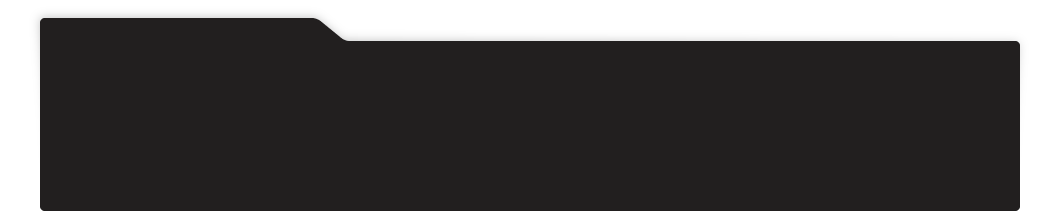
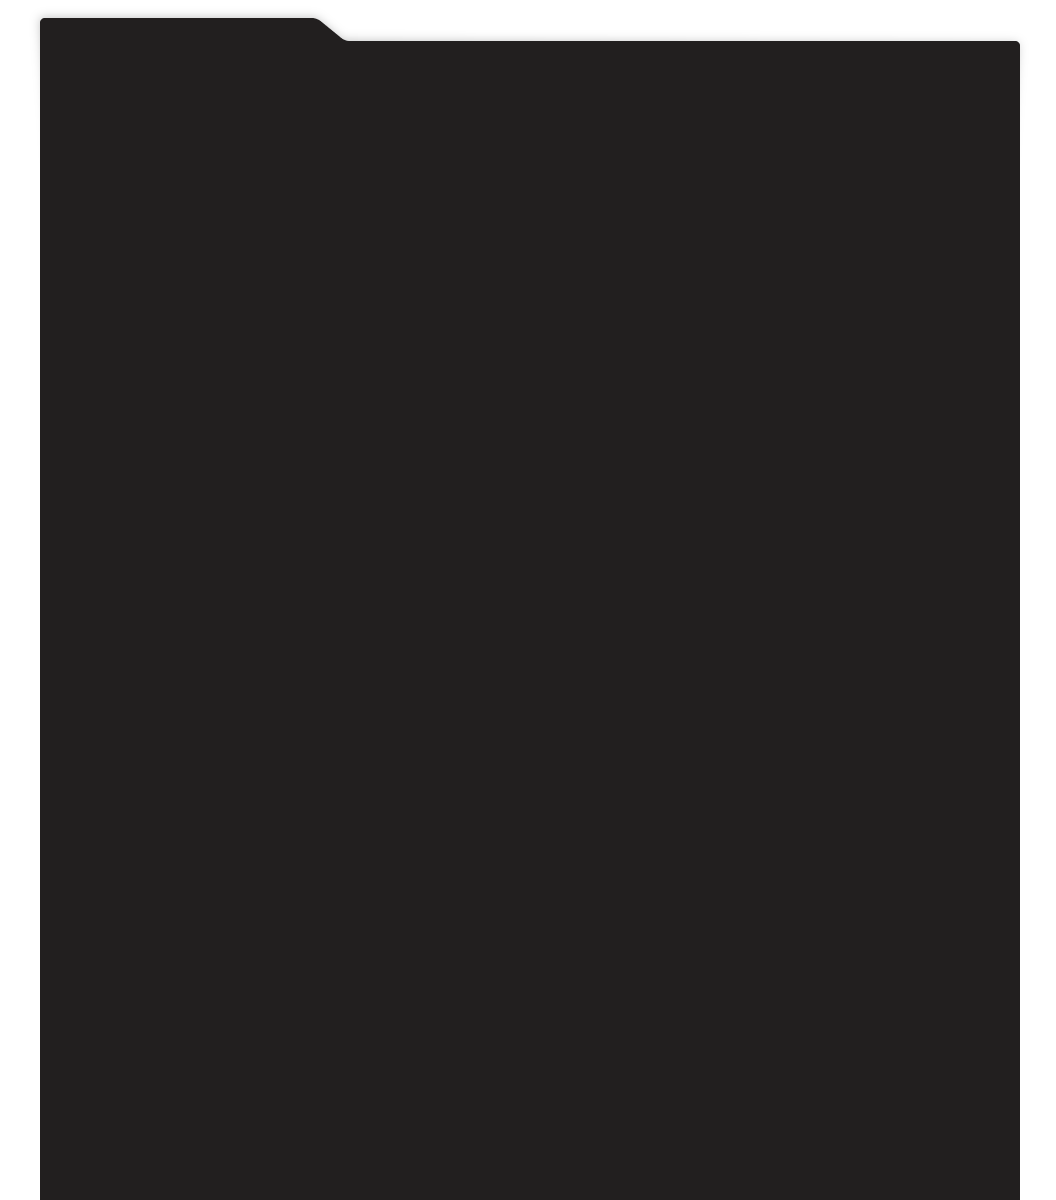
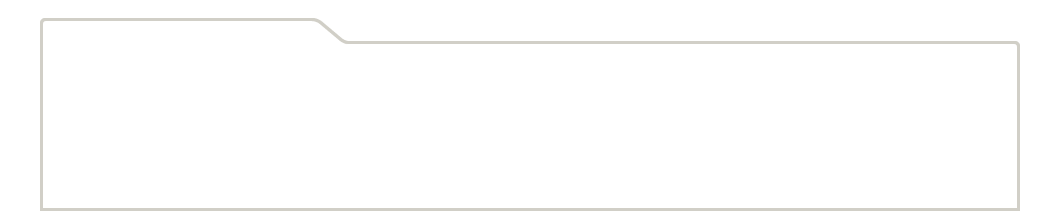
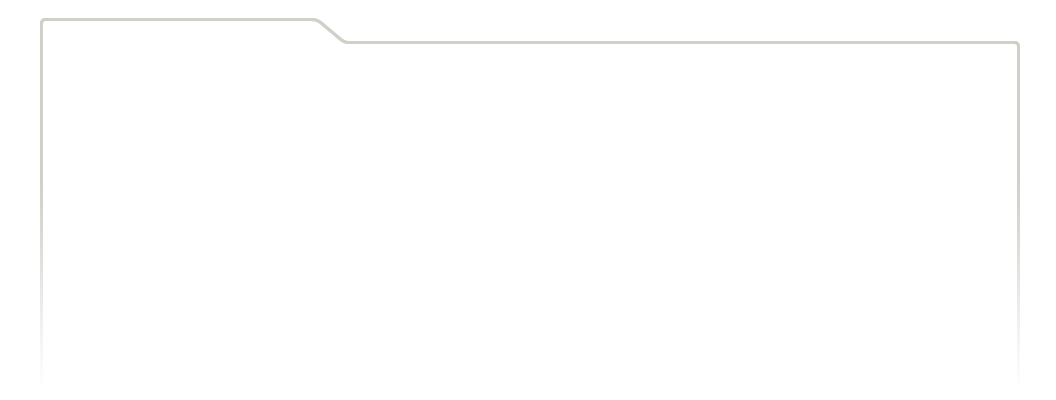
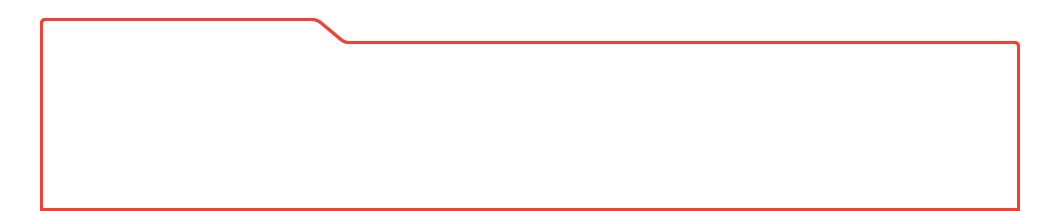
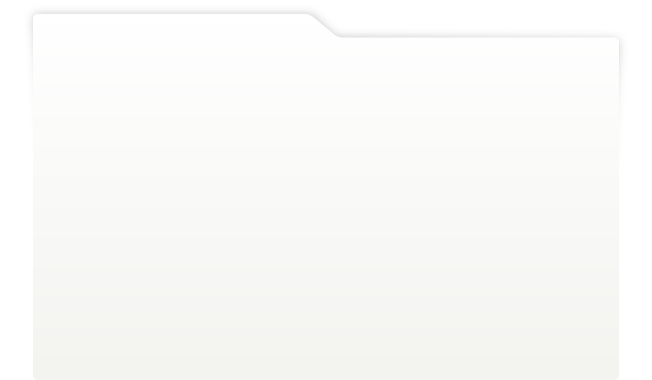
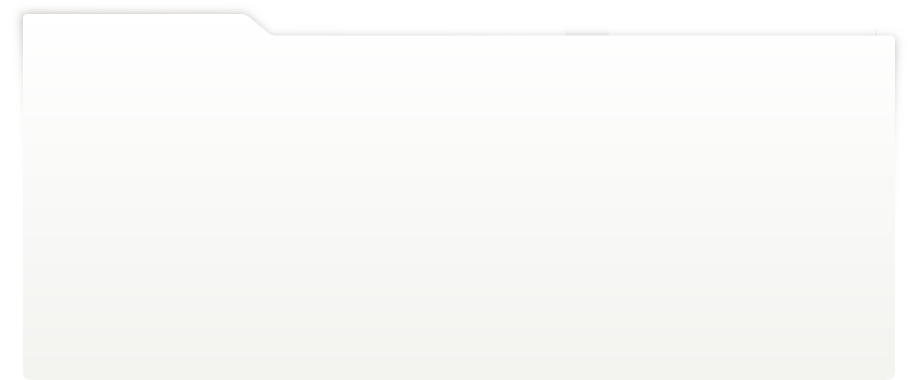
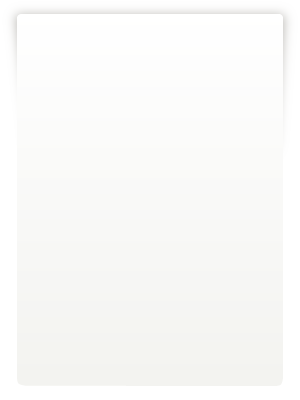
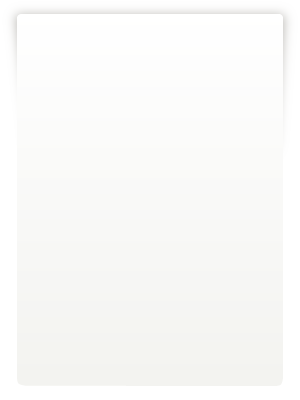
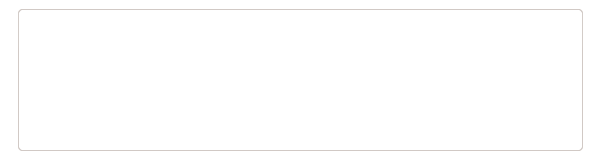
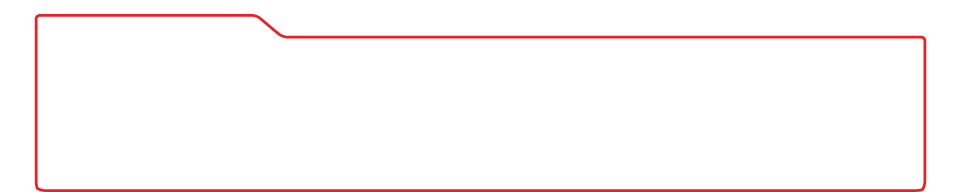
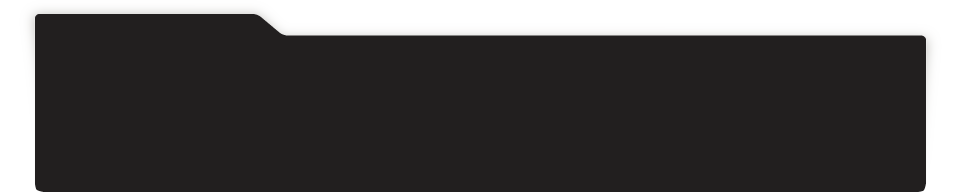
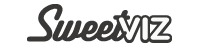
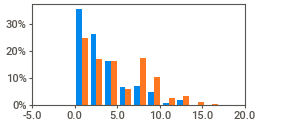
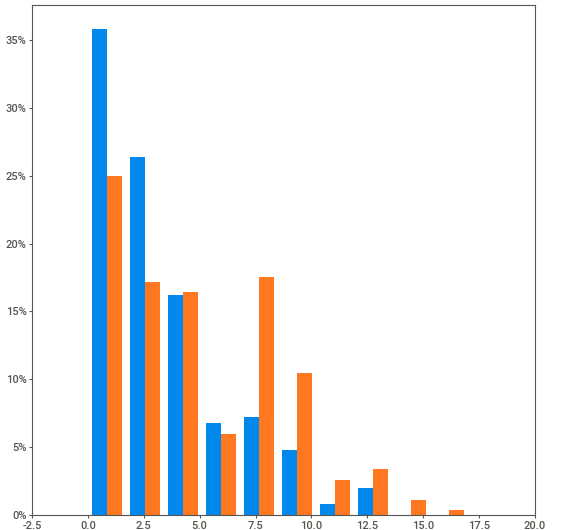
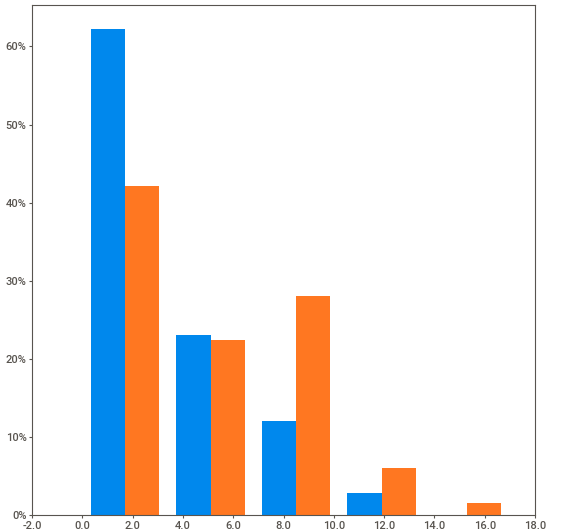
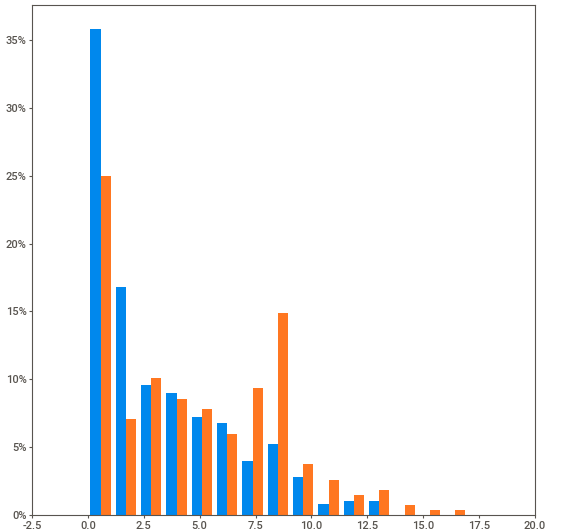
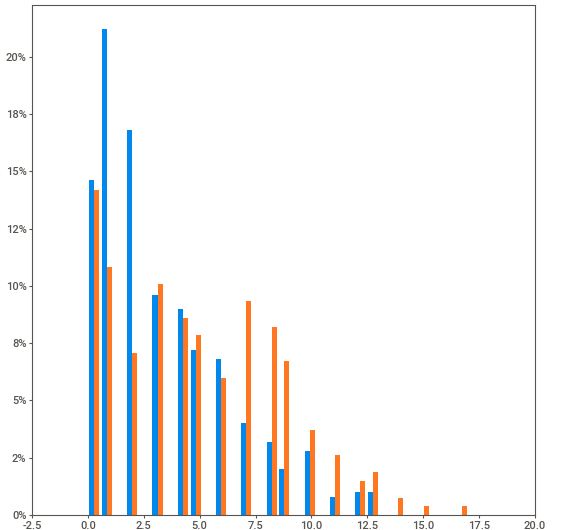
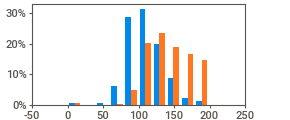
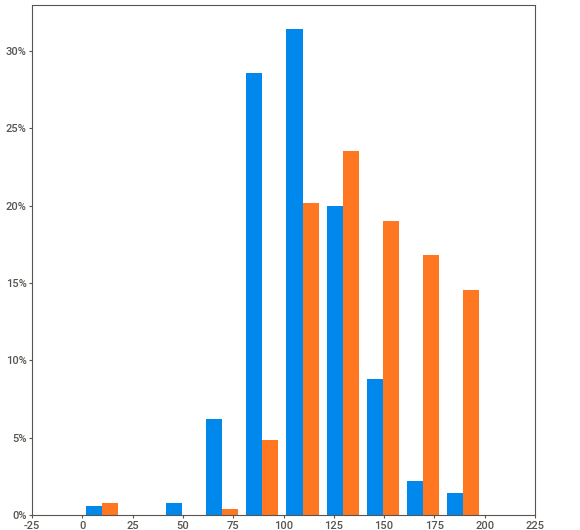
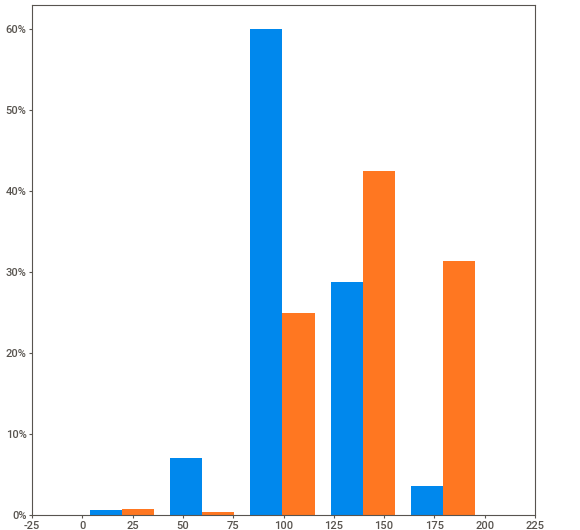
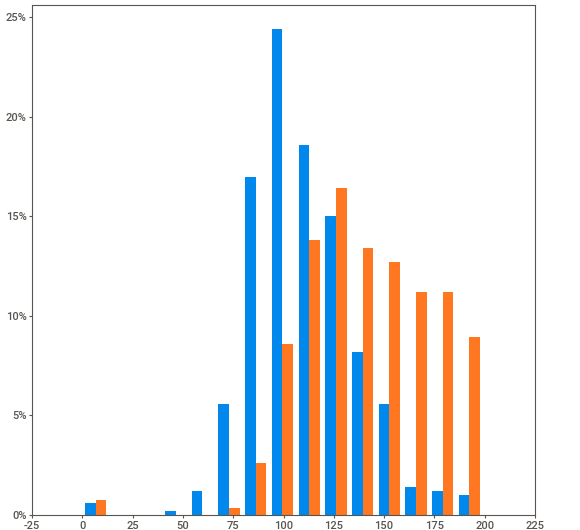
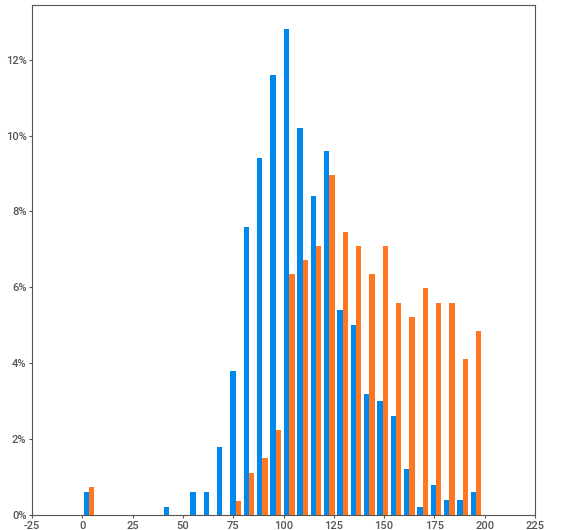
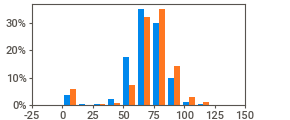
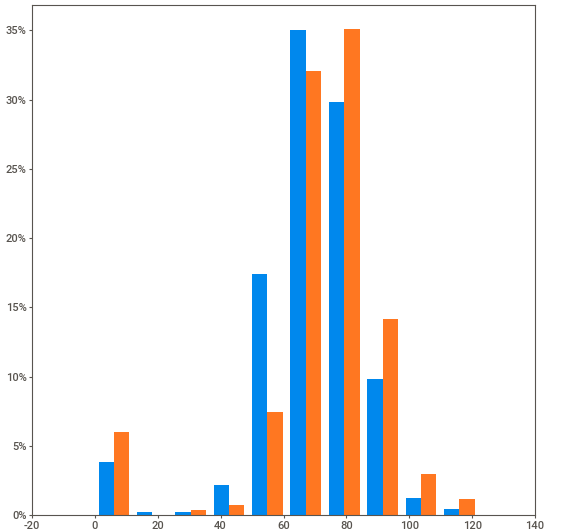
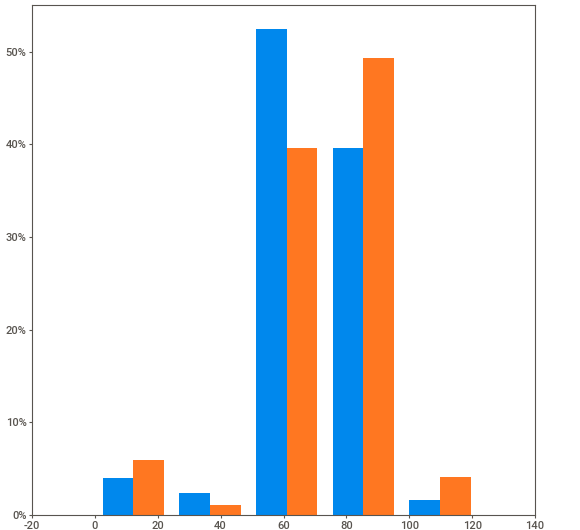
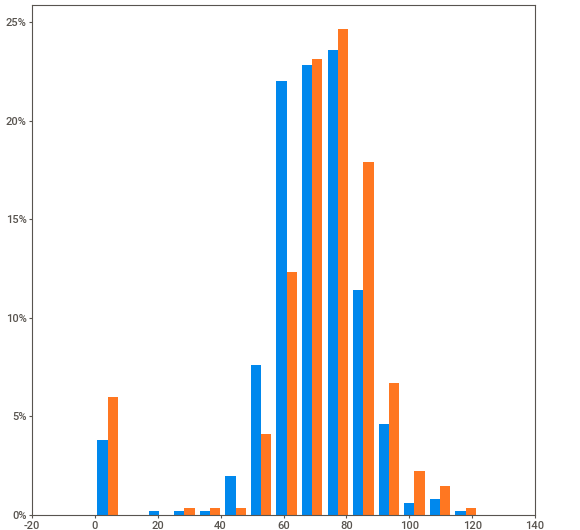
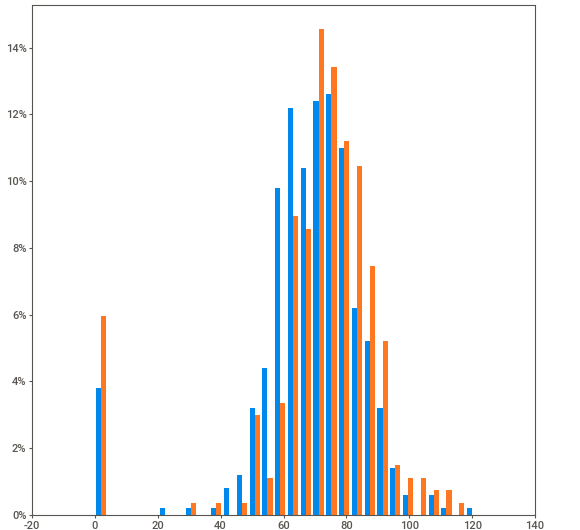
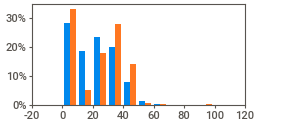
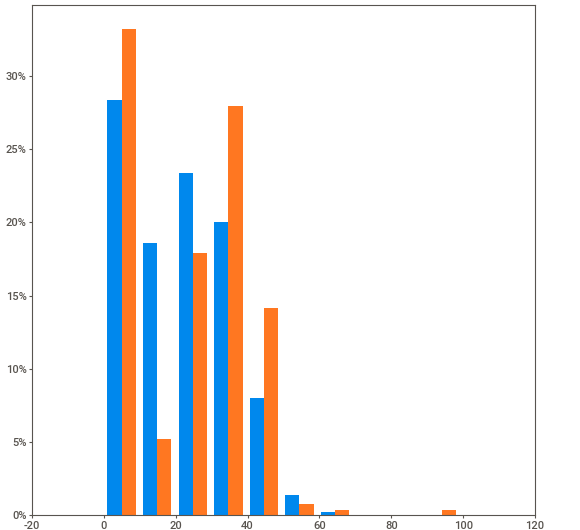
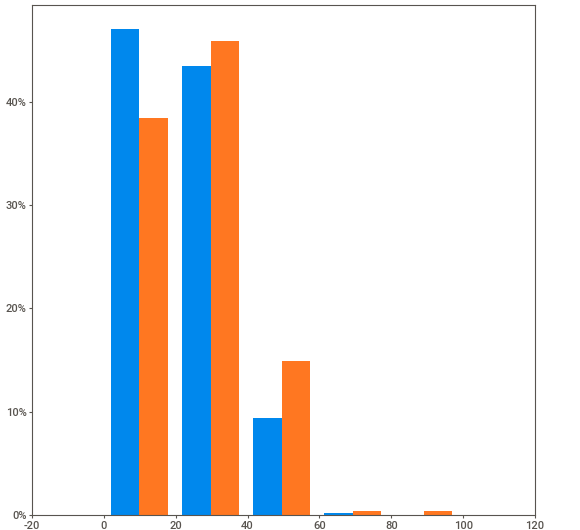
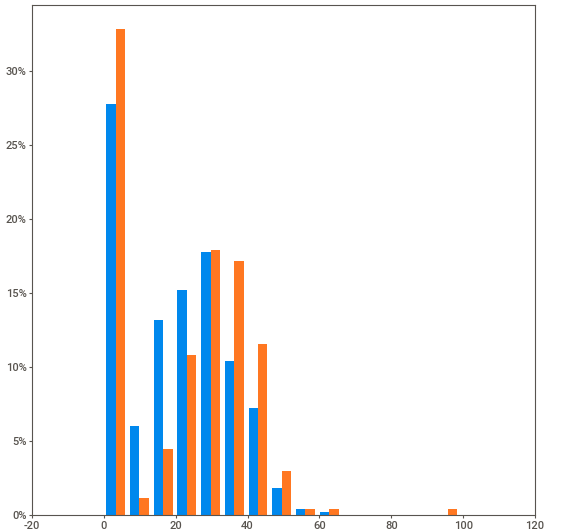
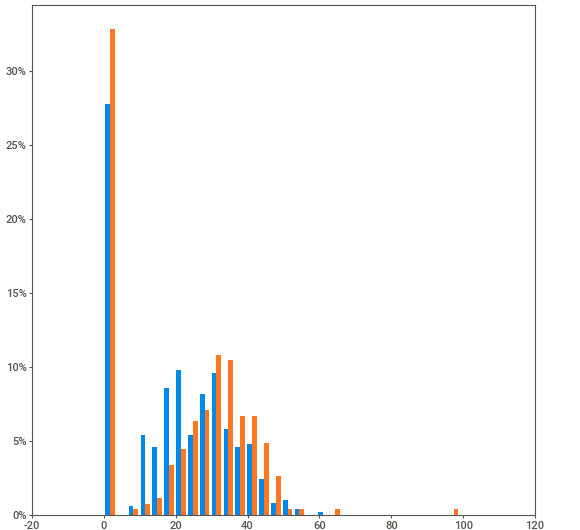
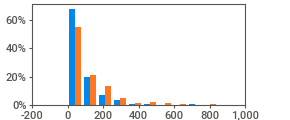
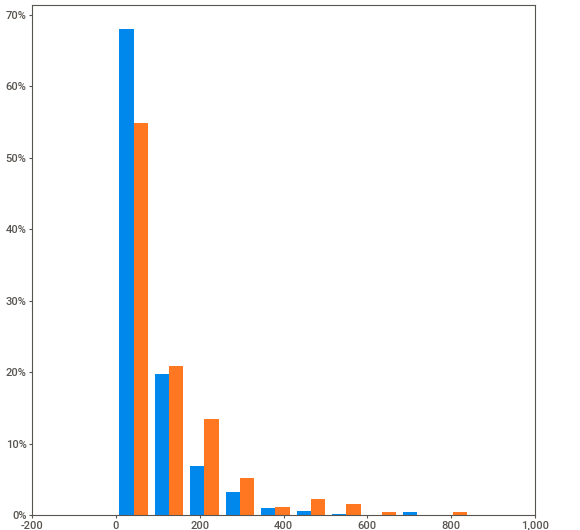
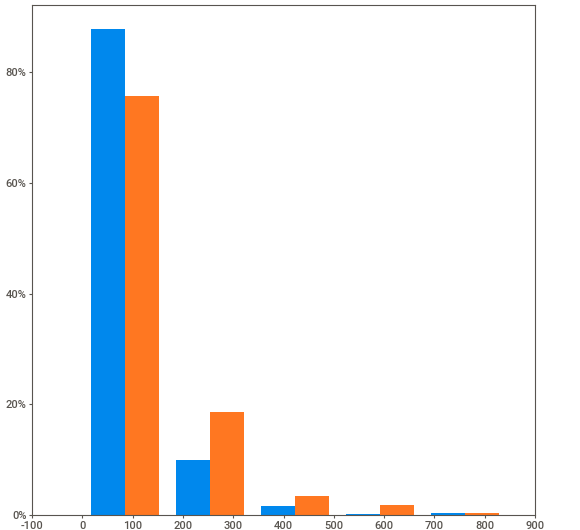
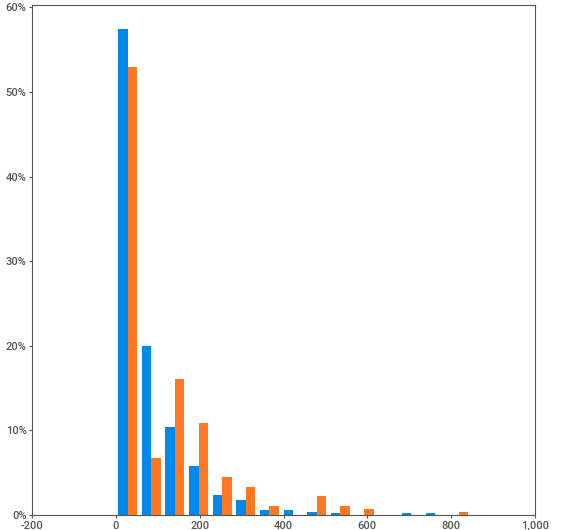
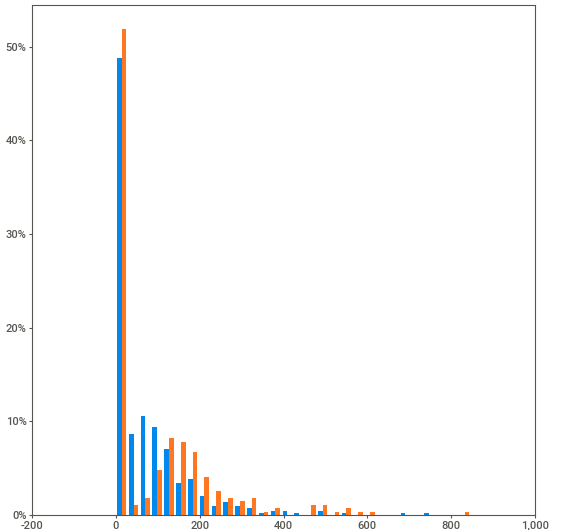
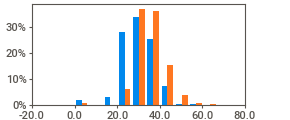
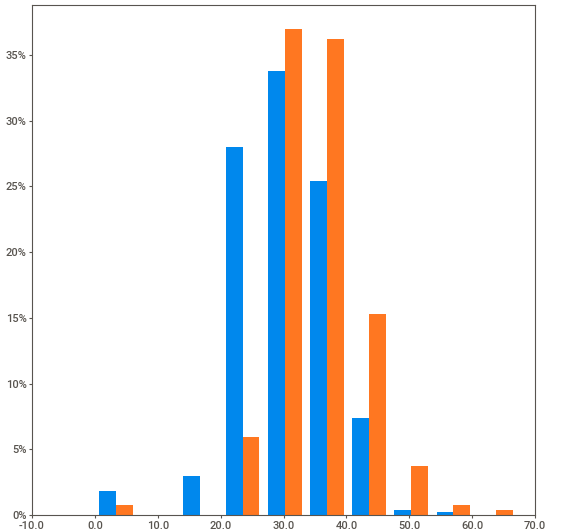
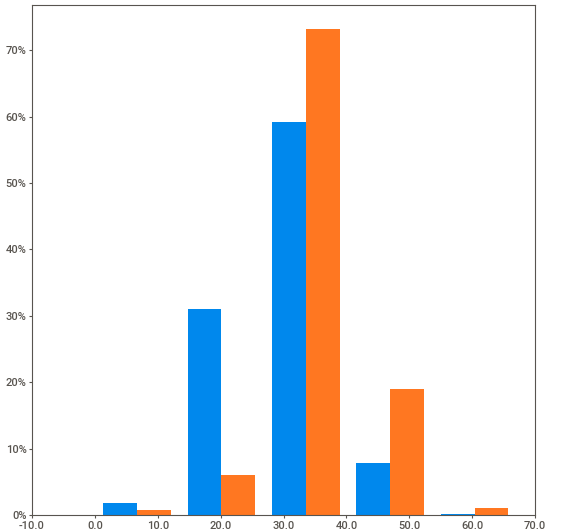
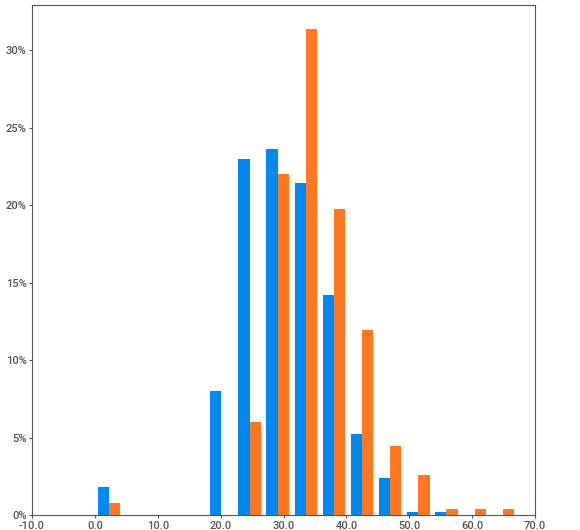
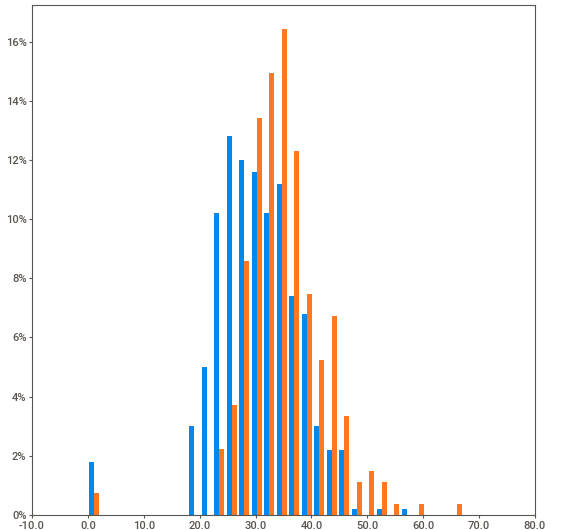
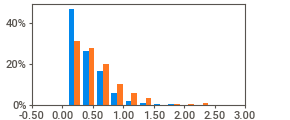
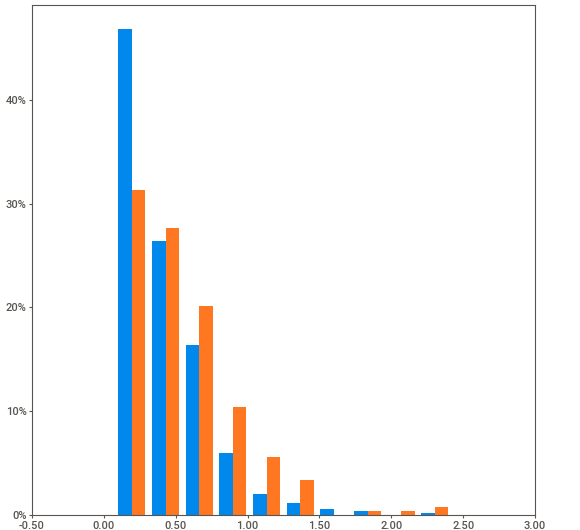
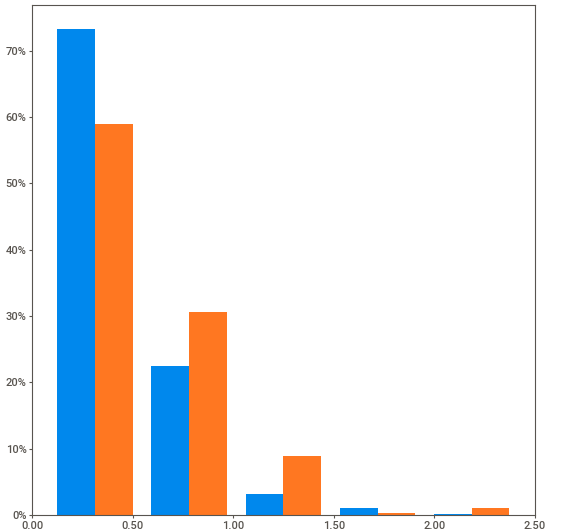
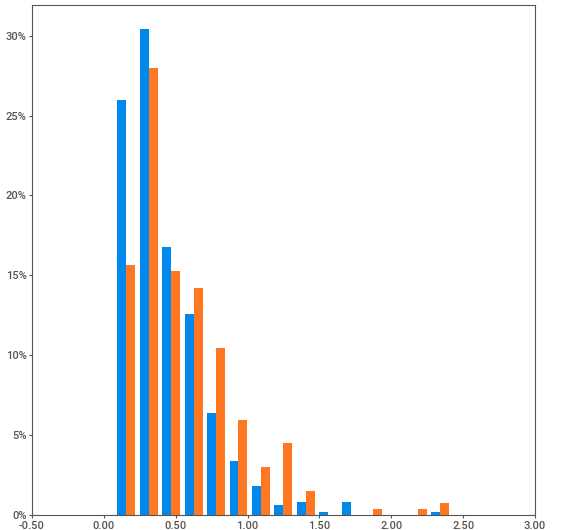
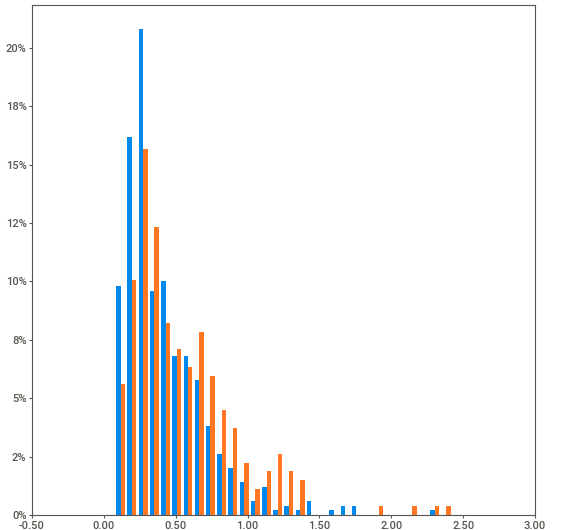
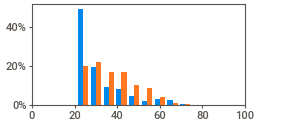
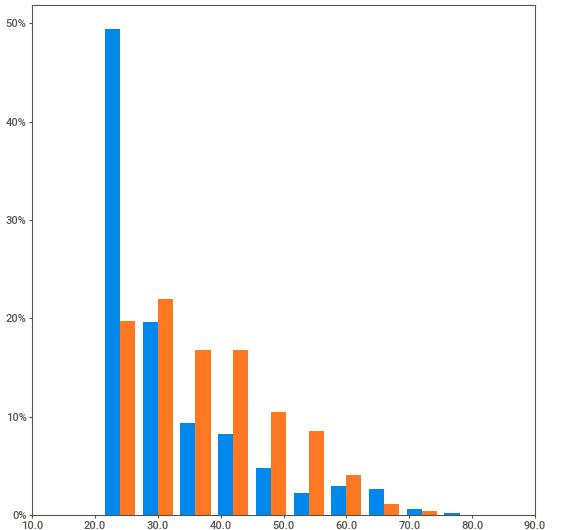
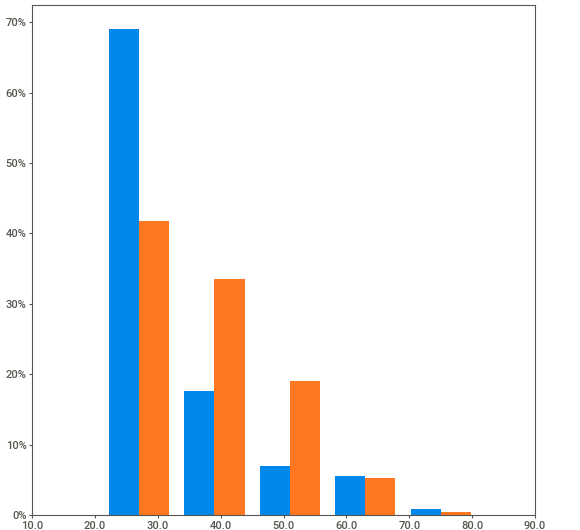
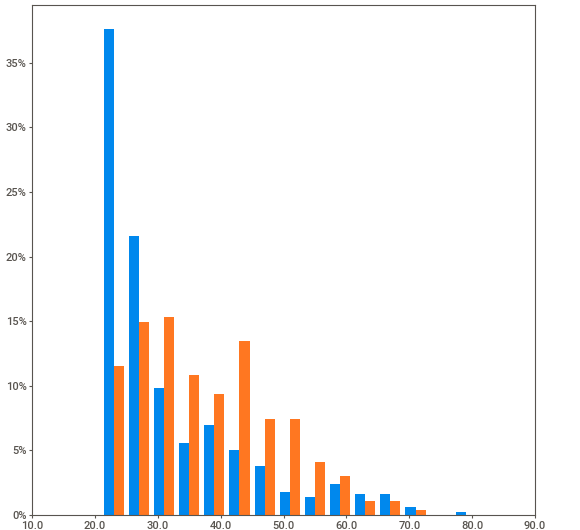
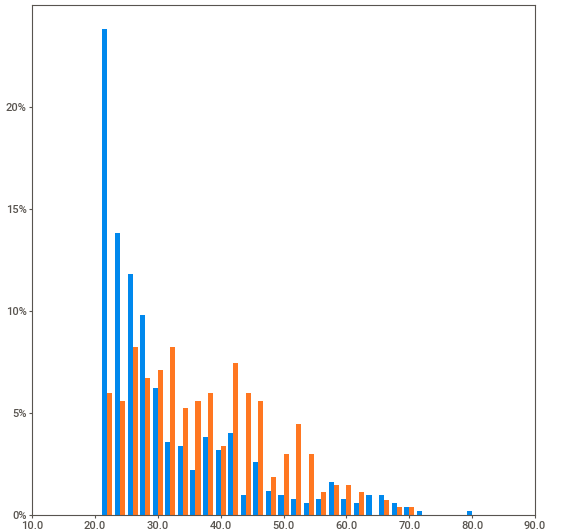
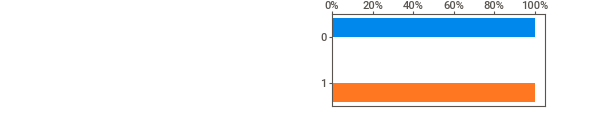
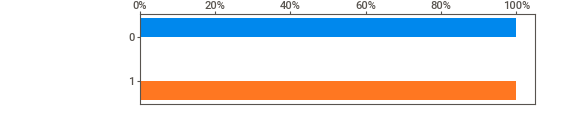
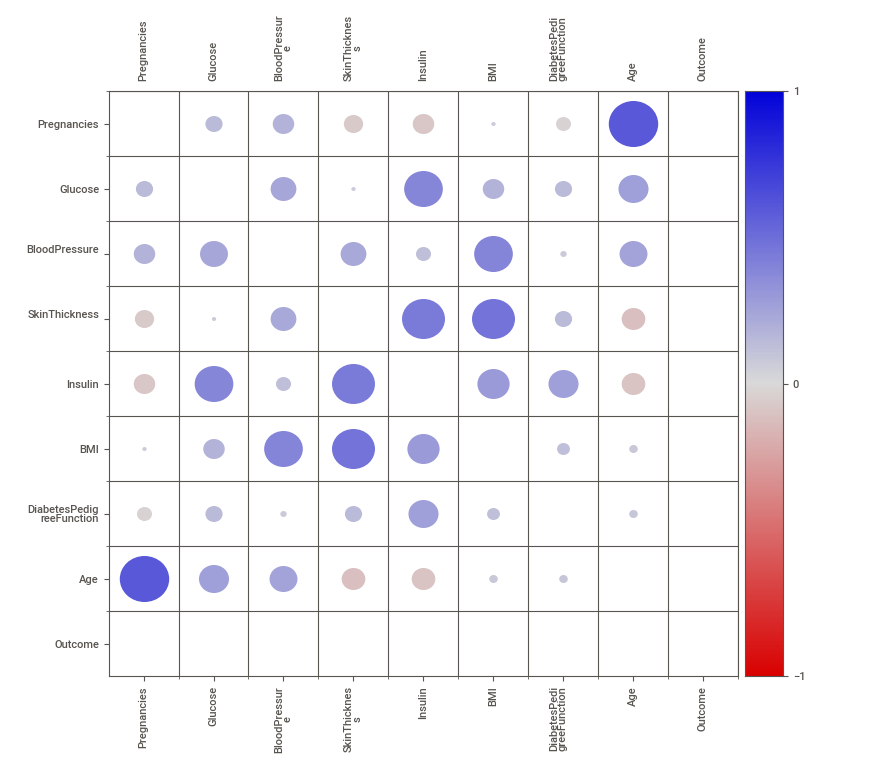
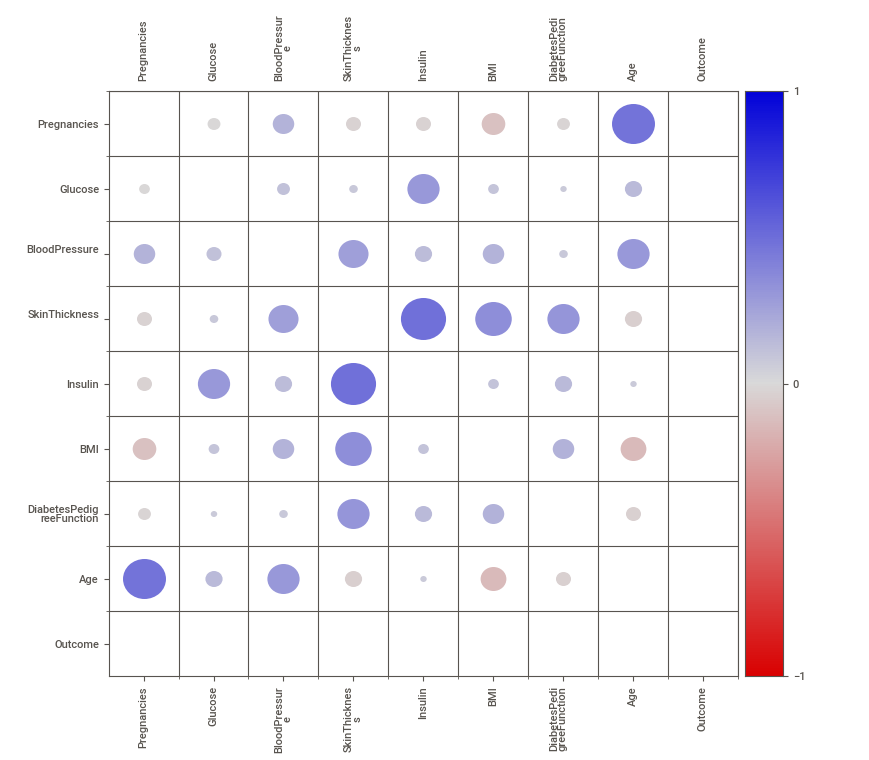

In [7]:
report = sv.compare((df.loc[df["Outcome"]==0], "Healthy"), (df.loc[df["Outcome"]==1], "Diabete"))
report.show_notebook()

### Conclusions
1. **Data Overview**

* **Dataset shape**: Number of rows and columns.
* **Target balance**: How balanced is the "Outcome" (e.g., % of positive vs negative cases).
  * If it's very imbalanced, you may later need resampling (SMOTE, undersampling).

2. **Feature Insights**

* **Basic stats**: Mean, median, standard deviation, min, max for each feature.
* **Missing values**: Features with a high % of missing data (attention: you may need to impute or drop).
* **Unique values**: For example, "Pregnancies" should have discrete, low-count values.

3. **Feature Relationships with Target ("Outcome")**

* **Association strength**: Sweetviz highlights which variables are most strongly linked to "Outcome"

  * Example: High glucose levels strongly correlate with a positive outcome.
* **Distribution differences**:

  * For each feature, how different the distributions are for Outcome = 0 vs Outcome = 1.
  * If the distributions are very similar, the feature might not be very predictive.
* **Visual cues**:

  * Overlapping histograms or side-by-side comparisons.

4. **Potential Data Problems**

* **Zero values that shouldn't be zero**: (common in medical datasets)

  * E.g., "Insulin = 0" or "BMI = 0"
* **Outliers**: Very high or low values that might need handling.

5. **Comparisons (if you compared training vs testing sets)**

* **Distribution drift**: Check if train/test splits have similar feature distributions.

  * If not, it may cause generalization issues later (data leakage, sampling bias).

6. **Recommendations for Next Steps**

Based on the EDA report, you can plan:

* Feature engineering (e.g., log-transform skewed variables, create new features).
* Data cleaning (e.g., handle missing/zero values, remove outliers).
* Model considerations (e.g., balancing classes, focusing on top correlated variables).


## EFA

Exploratory Factor Analysis ([EFA](https://www.numberanalytics.com/blog/exploratory-factor-analysis-practical-guide)) is a statistical method used to identify the underlying structure (latent variables or factors) within a set of observed variables, without having a predetermined theory about what that structure should be.

Key points about EFA:

* It reduces dimensionality: condensing many observed variables into fewer factors.

* It is exploratory, meaning you don’t set hypotheses about the factor structure beforehand (unlike Confirmatory Factor Analysis, CFA, where you test a specific structure).

* It assumes that correlations between observed variables are due to their common association with a smaller number of latent factors.

* It helps in scale development, psychological testing, market research, education studies, and more.

### Main concepts
| Concept             | Meaning                                                                         |
| ------------------- | ------------------------------------------------------------------------------- |
| **Communality**     | How much of a variable's variance is explained by common factors.               |
| **Uniqueness**      | How much variance is **not** explained (random noise).                          |
| **Factor Loadings** | Coefficients linking variables to factors. High loading means strong influence. |
| **Eigenvalues**     | Amount of variance explained by each factor.                                    |
| **Rotation**        | Improves interpretability without changing statistical fit.                     |


**Bartlett’s test** checks whether your correlation matrix is an identity matrix (where variables are uncorrelated). If p-value < 0.05 it significant and acceptable for running EFA.

**Kaiser-Meyer-Olkin (KMO)** measures how suitable your data is for factor analysis. It checks sampling adequacy, meaning whether the patterns of correlations are compact enough to produce distinct and reliable factors. A KMO value > 0.6 is generally considered acceptable for running EFA.

KMO Score: 0.589
Bartlett's Test p-value: 0.000


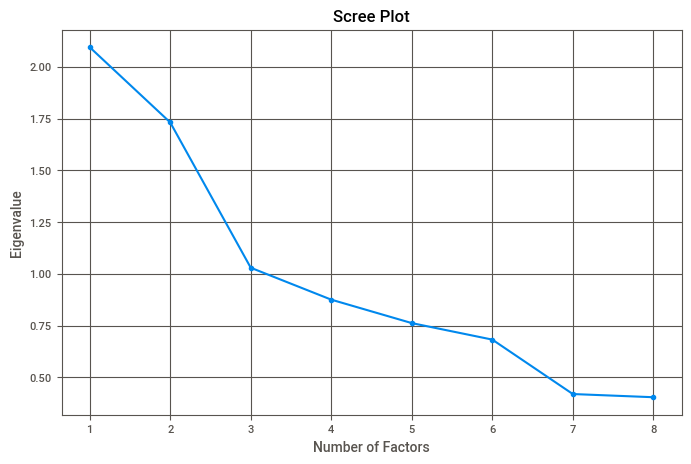

Number of factors to extract: 3
                                 0         1         2
Pregnancies               0.567933 -0.040564  0.013052
Glucose                   0.272599  0.313673  0.175400
BloodPressure             0.237514  0.052885  0.393438
SkinThickness            -0.158431  0.334956  0.512033
Insulin                  -0.071597  0.988676  0.138293
BMI                       0.027947  0.116657  0.707150
DiabetesPedigreeFunction  0.005053  0.186854  0.178031
Age                       0.947997  0.026038  0.027773


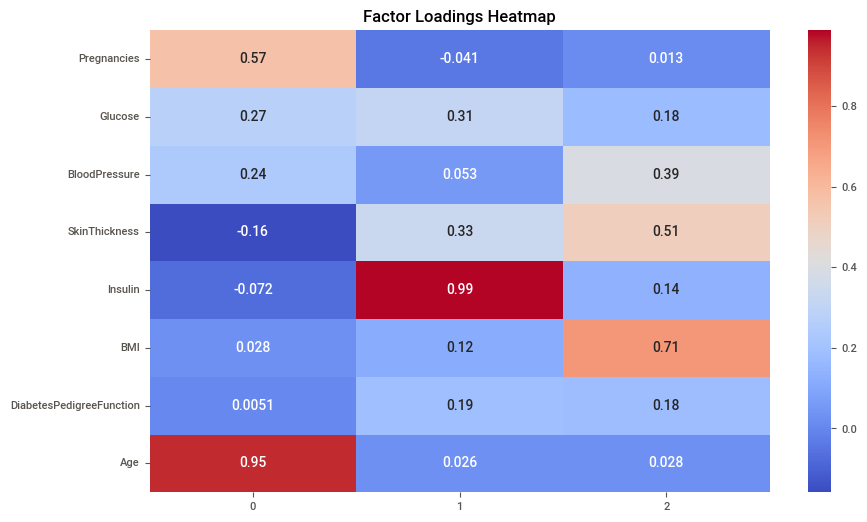

In [8]:
from factor_analyzer import FactorAnalyzer
from sklearn.preprocessing import StandardScaler

# Drop the target column for EFA (Outcome is not used)
X = df.drop(columns=['Outcome'])

# Handle missing values if any
X = X.dropna()

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Check the suitability for factor analysis
from factor_analyzer.factor_analyzer import calculate_kmo, calculate_bartlett_sphericity

kmo_all, kmo_model = calculate_kmo(X_scaled)
bartlett_chi_square_value, bartlett_p_value = calculate_bartlett_sphericity(X_scaled)

print(f"KMO Score: {kmo_model:.3f}")  # >0.6 is acceptable
print(f"Bartlett's Test p-value: {bartlett_p_value:.3f}")  # <0.05 means suitable

# Create FactorAnalyzer object
fa = FactorAnalyzer(rotation="varimax")

# Find optimal number of factors using eigenvalues
fa.fit(X_scaled)
ev, v = fa.get_eigenvalues()

# Plot eigenvalues (scree plot)
plt.figure(figsize=(8,5))
plt.plot(range(1, len(ev)+1), ev, marker='o')
plt.xlabel('Number of Factors')
plt.ylabel('Eigenvalue')
plt.title('Scree Plot')
plt.grid()
plt.show()

# Select number of factors where eigenvalues > 1 (or elbow point from scree plot)
n_factors = sum(ev > 1)
print(f"Number of factors to extract: {n_factors}")

# Run EFA with selected number of factors
fa = FactorAnalyzer(n_factors=n_factors, rotation="varimax")
fa.fit(X_scaled)

# Get loadings
loadings = pd.DataFrame(fa.loadings_, index=X.columns)
print(loadings)

# Optional: visualize factor loadings
plt.figure(figsize=(10,6))
sns.heatmap(loadings, cmap="coolwarm", annot=True)
plt.title('Factor Loadings Heatmap')
plt.show()


**Factor 0**
- Age loads very highly (0.95)
- Pregnancies loads moderately high (0.57)
- Others (Glucose, BP, etc.) load weakly (< 0.3)

Conclusion for Factor 0:
- Factor 0 is strongly related to Age and Pregnancy History.
- Likely represents "Demographic Risk" or "Age-related Risk".

**Factor 1**
- Insulin loads very highly (0.99)
- SkinThickness moderately loads (0.33)
- Glucose weakly loads (0.31)
- Others load weakly.

Conclusion for Factor 1:
- Factor 1 is strongly dominated by Insulin levels.
- Possibly represents "Insulin Metabolic Activity".

**Factor 2**
- BMI loads highly (0.71)
- SkinThickness moderately (0.51)
- BloodPressure (0.39)
- Others are weak.

Conclusion for Factor 2:
- Factor 2 is related to Body Composition and Blood Pressure.
- Could represent "Obesity and Cardiovascular Risk".

In [9]:
factor_scores = fa.transform(X_scaled)
factor_df = pd.DataFrame(factor_scores, columns=["Demographic_Risk", "Insulin_Activity", "Obesity_CV_Risk"])
factor_df.head()

Demographic_Risk  Insulin_Activity  Obesity_CV_Risk
0          1.310668         -0.745412         0.567261
1         -0.282845         -0.721307        -0.212516
2          0.117325         -0.629770        -0.792889
3         -1.022842          0.084350        -0.354652
4         -0.251025          0.777524         1.002583

>EFA is **reverse-engineering** your dataset's correlation structure
into a few hidden factors that explain most of the relationships + **filter out noise**.

### Difference between EFA and PCA
| Feature                     | EFA                                   | PCA                                      |
| --------------------------- | ------------------------------------- | ---------------------------------------- |
| Purpose                     | Understand **latent causes**          | Reduce **dimensionality**                |
| Variables modeled as        | Influenced by **factors** + **error** | Sum of components                        |
| Error terms                 | Explicitly modeled                    | Ignored                                  |
| What variance is explained? | **Common variance** only              | **All variance**                         |
| Rotation                    | Important for interpretability        | Can rotate, but not necessary            |
| Outputs                     | **Factors** (theoretical constructs)  | **Components** (mathematical constructs) |


## Outlier detection 

Outlier detection refers to identifying data points that deviate significantly from the majority of a dataset. These "anomalous" points may indicate variability in measurement, experimental errors, or novel phenomena worth further investigation.

Outliers can distort statistical analyses and machine learning models, leading to misleading results if not properly handled.


**Types of Outliers**

* **Global (Point) Outliers:** A single data point far from the rest (e.g., a height of 2.5 meters when most are around 1.7 meters).
* **Contextual (Conditional) Outliers:** Outliers only under certain conditions (e.g., 35°C is normal in summer but abnormal in winter).
* **Collective Outliers:** A group of related data points that are collectively anomalous (e.g., a sudden burst of network traffic suggesting a cyberattack).

**Outlier Detection Methods**

1. **Statistical Methods**

   * Assumes a distribution (e.g., normal distribution).
   * Data points beyond ±3 standard deviations are flagged as outliers.
   * IQR method

2. **Distance-Based Methods**

   * Measures the distance between data points.
   * Points far from their neighbors are flagged.

3. **Density-Based Methods** (e.g., **Local Outlier Factor (LOF)**)

   * Detects outliers based on the density of surrounding points.
   * Points in low-density regions compared to their neighbors are outliers.

4. **Model-Based Methods**

   * Use machine learning models like **Isolation Forest** or **One-Class SVM** to learn "normal" data and isolate outliers.


### IQR method

The Interquartile Range (IQR) is a statistical measure of spread — it tells you how far apart the middle 50% of your data is. 

The IQR method for outlier detection uses this idea:

- It finds the "middle" of the data.

- It identifies data points that are too far away from the middle.

- Those points are considered outliers.

**Steps:**
1. Calculate

* **Q1 (First Quartile)** = value at 25% of the data → separates the lowest 25% from the rest.
* **Q3 (Third Quartile)** = value at 75% of the data → separates the highest 75% from the rest.
* **IQR** = Q3 - Q1
2. Define boundaries
* **Lower Bound** = $Q1 - 1.5 \times IQR$
* **Upper Bound** = $Q3 + 1.5 \times IQR$
3. Find outliers

* Any data points **less than** the lower bound or **greater than** the upper bound are considered **outliers**.

Why Use the IQR Method?

* **No assumptions about distribution:** Works even if the data is **not normally distributed** (good for skewed data).
* **Robust to extreme values:** Because it uses the median, it is **not affected by outliers** when calculating Q1 and Q3.


<img src = "iqr_method.png" height=500 width= 1000 align="left">

In [10]:
import plotly.graph_objects as go 

def plot_outliers_iqr(df, column):

    fig = go.Figure() 
        
    values = df[column]
    
    q1 = df[column].quantile(0.25)
    q3 = df[column].quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr

    # Identify inliers and outliers
    inliers = values[(values >= lower_bound) & (values <= upper_bound)]
    outliers = values[(values < lower_bound) | (values > upper_bound)]

    # Plotting histograms
    fig.add_trace(go.Histogram(x=inliers, name="Main data"))
    fig.add_trace(go.Histogram(x=outliers, name=f"Outliers", marker_color='grey'))

    fig.update_layout(
        title=f"Distributions of {column} (IQR Method)",
        yaxis_title="Count of Samples",
        xaxis_title="Values",
        bargap=0.2,
        showlegend=True
    )

    # path = f"{column}_distribution_with_outliers.html"
    # fig.write_html(path)

    fig.show()

In [11]:
plot_outliers_iqr(df, "BMI")

### z-score


A **z-score** (also called a **standard score**) measures how many **standard deviations** a data point is from the **mean** of a dataset.

* If the z-score is **0**, the data point is exactly at the mean.
* A **positive** z-score means the data point is **above** the mean.
* A **negative** z-score means the data point is **below** the mean.

The formula for the z-score is:

$$
z = \frac{x - \mu}{\sigma}
$$

where:

* $x$ - the data point
* $\mu$ - the mean of the dataset
* $\sigma$ - the standard deviation of the dataset

**In simple terms:**
> The z-score tells you **how unusual** or **typical** a value is compared to the overall data.

Intuitive Meaning

* If $z = 0$, the point is **exactly at the mean**.
* If $z = 1$, the point is **one standard deviation above** the mean.
* If $z = -2$, the point is **two standard deviations below** the mean.
* Larger |z| values mean the point is **more unusual or extreme**.

**Why It Works**

Because in a **normal distribution** (bell curve):

* About **68%** of data falls within $\pm 1\sigma$ of the mean
* About **95%** falls within $\pm 2\sigma$
* About **99.7%** falls within $\pm 3\sigma$

This is called the **Empirical Rule**.

Thus:

* If a data point has $|z| > 3$, it’s in the extreme 0.3% — very likely an **outlier**.



In [12]:
def plot_outliers_zscore(df, column, threshold=3):
    fig = go.Figure()
    
    values = df[column]
    
    # Calculate z-scores
    z_scores = stats.zscore(values)
    
    # Identify inliers and outliers based on threshold
    inliers = values[np.abs(z_scores) <= threshold]
    outliers = values[np.abs(z_scores) > threshold]
    
    # Plotting histograms
    fig.add_trace(go.Histogram(x=inliers, name="Main data"))
    fig.add_trace(go.Histogram(x=outliers, name="Outliers", marker_color='grey'))
    
    fig.update_layout(
        title=f"Distribution of {column} (Z-score Method)",
        yaxis_title="Count of Samples",
        xaxis_title="Values",
        bargap=0.2,
        showlegend=True
    )
    
    fig.show()

In [16]:
plot_outliers_zscore(df, "BMI", 1)

# Home task

### Task 1
Objective: Apply statistical hypothesis testing to evaluate the impact of different website themes on user engagement.

Dataset: [Light vs. Dark Theme User Behavior Dataset](https://statso.io/website-performance-case-study/)

Tasks:

1. Formulate Hypotheses:

* Null Hypothesis (H₀)
* Alternative Hypothesis (H₁)

2. Statistical Testing:

* Use a two-sample t-test to compare the mean conversion rates between the two groups.
* Calculate the p-value and interpret the results at a 5% significance level.

3. Interpretation:

* Discuss whether the data provides sufficient evidence to reject the null hypothesis.
* Consider the practical implications of your findings for website design decisions.

### Task 2
Objective: Perform EDA to understand the dataset's structure and identify any anomalies or outliers.

Dataset: [Medical Cost Personal](https://www.kaggle.com/datasets/mirichoi0218/insurance)

Tasks:

1. Data Exploration:

* Load the dataset and display the first few rows.
* Use descriptive statistics to summarize the data.

2. Outlier Detection:

* Identify outliers in numerical variables using one of provided methods.
* Discuss potential reasons for these outliers and how they might affect analysis.

3. Data Cleaning:

* Decide on strategies to handle missing values and outliers (e.g., imputation, removal).
* Justify your choices and implement the cleaning process.

### Task 3
Objective: Uncover underlying factors that explain the patterns observed in survey responses related to work pressures.

Dataset: [Airline Passenger Satisfaction Survey](https://www.kaggle.com/code/francoisstamant/eda-and-factor-analysis/input)

Tasks:

1. Data Preparation:

* Load the dataset and focus on the survey items.
* Check for missing values and handle them appropriately.

2. Factor Analysis:

* Determine the number of factors to extract using methods like the Kaiser criterion and scree plot.
* Perform EFA using an appropriate rotation method (e.g., varimax).
* Interpret the factor loadings and name the factors based on the items that load highly on them.

3. Reporting:

* Summarize the findings of your factor analysis.
* Discuss how these factors could be used in further research or practical applications.